# 1. 파일 불러오기 및 필요한 데이터 객체 생성

In [1]:
import os
import pandas as pd

import collections

import networkx as nx
import numpy as np

In [1]:
# os.chdir("C:\\*****")
# os.getcwd()

In [3]:
thr = 0.3

def cor_trans(x) :
    
    cor_t = x.corr() # pearson correlation matrix
    
    for j in range(x.shape[1]) :
        for k in range(x.shape[1]) :
            if (j==k) :
                cor_t.iloc[j,k] = 0
            elif (cor_t.iloc[j,k] > thr) :
                cor_t.iloc[j,k] = cor_t.iloc[j,k]
            else :
                cor_t.iloc[j,k] = 0
    
    return cor_t

In [4]:
#x : 데이터, n : 시점개수, t : 누적할 시점수
def cumulative_cor_mat(x, n, t) :
    
    col_name = np.array(["red", "orange", "yellow", "green", "blue", "purple"])
    col_list=[]
    col_list = list(np.repeat(col_name, [2, 12, 4, 5, 7, 6], axis=0)) + list(np.repeat(col_name, [2, 12, 4, 5, 7, 6], axis=0))
    
    dat_list = []
    cor_list = []
    graph_list = []
    
    for i in range(n) :
        dat_list.append(x.iloc[:((i+1)*t), 1:]) # 누적 시점에 대해 time 열 제외 
        cor_mat = cor_trans(dat_list[i])
        cor_list.append(cor_mat)
        
        G = nx.from_numpy_matrix(np.matrix(cor_mat), create_using = nx.Graph) # undirected graph
        mapping = dict(zip(G, range(1, 73))) 
        G = nx.relabel_nodes(G, mapping) # 노드 번호 0 ~ 71 -> 1 ~ 72
        # print(G.edges(data=True))
        
        color_dict = {node: col_list[node-1] for node in G} 
        nx.set_node_attributes(G, color_dict, "color") # color node attribute for visualization
        # print(G.nodes(data=True))
        
        graph_list.append(G)
    
    return graph_list, cor_list, dat_list

In [5]:
def make_graph_data(name_list, default_path_str, group_name_str) :
    
    for i in range(len(name_list)) :
        
        # load file
        path = default_path_str + name_list[i] + '.csv'
        file = pd.read_csv(path, header=1, skiprows=0) #  첫 행 header 설정 및 스킵 
        file = file.drop_duplicates() # remove duplicate data 
        file['time'] = range(1, file.shape[0] + 1) 
    
        # create graph, corelation matrix, data list (cumulative)
        graph_list, cor_list, dat_list = cumulative_cor_mat(file, 6, 5000)

        # create dictionaries for data handling (group : [[graph list 1], [graph list 2], ... ,])
        graph_dict[group_name_str].append(graph_list)
        cor_dict[group_name_str].append(cor_list)
        dat_dict[group_name_str].append(dat_list)
        
        
        ## = 아래는 처음부터 train, test dataset 고정해서 분리하는 과정 = ##
        
#         if i < len(name_list) - 3 :
#             graph_dict[group_name_str].append(graph_list)
#             cor_dict[group_name_str].append(cor_list)
#             dat_dict[group_name_str].append(dat_list)
#         else : # test 데이터 고정 (hc, lt, rc 끝 파일 3개)
#             graph_test_dict[group_name_str].append(graph_list)
#             cor_test_dict[group_name_str].append(cor_list)
#             dat_test_dict[group_name_str].append(dat_list)     

In [6]:
# @@ 추후 k-fold로 test나누고 여기는 90개 한번에 @@ 20분정도 (코드 수정하면서 여러번 시도해보려면 아래 소규모 코드 활용)

lt_name = ['**']
rt_name = ['**']
hc_name = ['**']

graph_dict = collections.defaultdict(list)
cor_dict = collections.defaultdict(list)
dat_dict = collections.defaultdict(list)

make_graph_data(lt_name, 'dat_Epilepsy_MEG\\', 'lt')
make_graph_data(rt_name, 'dat_Epilepsy_MEG\\', 'rt')
make_graph_data(hc_name, 'dat_Healthy_MEG\\', 'hc')

In [7]:
print(len(graph_dict['lt']))
print(len(graph_dict['lt']))
print(len(graph_dict['hc']))
print(len(graph_dict['lt'])+len(graph_dict['rt'])+len(graph_dict['hc']))

22
22
46
90


### <파일 불러오기 및 필요한 데이터 객체 생성> 코드 이해를 위한 참고용 코드
주석이나 출력 결과와 함께 살펴보기

#### 파일 불러오기 부분

In [4]:
lt020 = lt020.drop_duplicates() # remove duplicate data 
print(lt020.shape)   

(30153, 73)


#### 그래프, 상관행렬, 데이터 반환 부분

In [14]:
import networkx as nx
import numpy as np

In [15]:
G = nx.Graph() # undirected graphs

#### lt, rt, hc 그룹별 접근을 위한 데이터 핸들링 부분

In [ ]:
# 지금 현재 [시점 1, 시점 2, 시점 3, ...]에 대해서 그래프 리스트, 상관행렬 리스트, 데이터 리스트

# lt - [시점 1, 시점 2, 시점 3, ...]
# rt - [시점 1, 시점 2, 시점 3, ...]
# rt - [시점 1, 시점 2, 시점 3, ...]
# hc - [시점 1, 시점 2, 시점 3, ...]
# 그룹 레이블이 있는 그래프 리스트, 상관행렬 리스트, 데이터 리스트

In [ ]:
import collections
graph_dict = collections.defaultdict(list)
graph_dict['lt'].append(graph_list)

cor_dict = collections.defaultdict(list)
cor_dict['lt'].append(cor_list)

dat_dict = collections.defaultdict(list)
dat_dict['lt'].append(dat_list)

In [62]:
graph_dict

defaultdict(list,
            {'lt': [[<networkx.classes.graph.Graph at 0x1c22648a608>,
               <networkx.classes.graph.Graph at 0x1c22e73dac8>]]})

In [79]:
print(graph_dict.keys())
print(len(graph_dict['lt'])) # 위에서 lt 파일 2개 열어서 넣었음
print(len(graph_dict['lt'][0])) # lt 한 명의 그래프 6개 (누적 cor 함수)

dict_keys(['lt', 'rt', 'hc'])
2
6


In [80]:
print(cor_dict.keys())
print(len(cor_dict['lt'])) 
print(len(cor_dict['lt'][0]))

dict_keys(['lt', 'rt', 'hc'])
2
6


In [81]:
print(dat_dict.keys())
print(len(dat_dict['lt'])) 
print(len(dat_dict['lt'][0]))

dict_keys(['lt', 'rt', 'hc'])
2
6


---

# 2. 상관행렬 히트맵 그리기

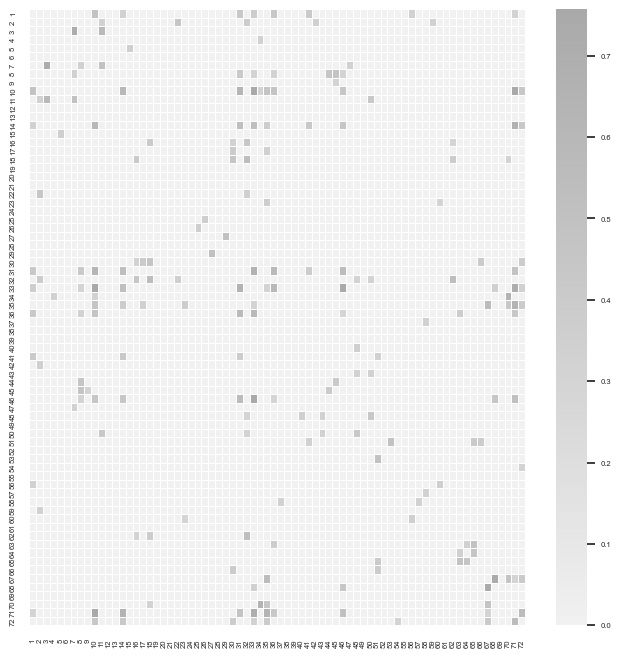

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale=0.5) # x축, y축 레이블 크기
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(cor_dict['lt'][0][0], annot=False, cmap=cmap, linewidths=.5,
           xticklabels = range(1,73), yticklabels = range(1,73))
plt.show()

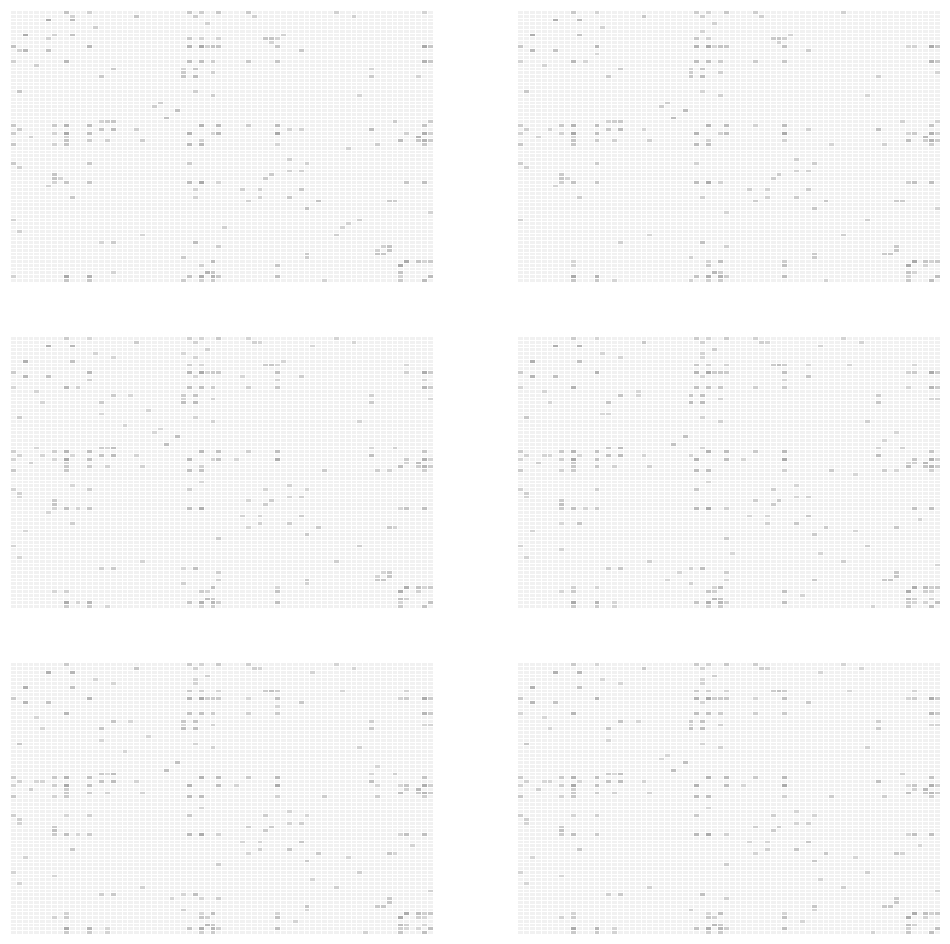

In [83]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

for row in range(3):
    for col in range(2):
        idx = row * 2 + col
        
        if idx < len(cor_list):
            ax = axes[row][col]
            cmap = sns.light_palette("darkgray", as_cmap=True)
            sns.heatmap(cor_dict['lt'][0][idx], annot=False, cmap=cmap, cbar=False, linewidths=.5, # lt 첫번째
                        xticklabels = [], yticklabels = [], ax=ax)
            # ax.set(xlabel=dept)

# 3. 네트워크

# 3-1. networkx 패키지 활용

앞에 처음 데이터 구조화할 때도, networkx 패키지로 네트워크 객체 생성

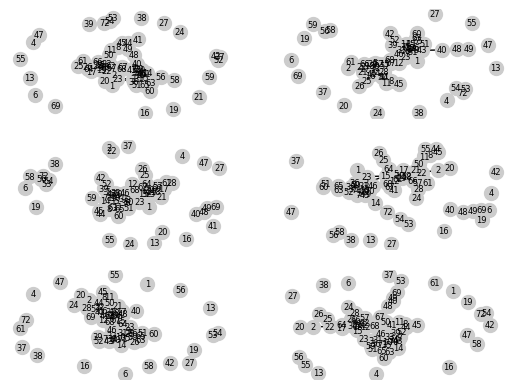

In [66]:
for i in range(6) :
    G = graph_dict['hc'][0][i]
    plt.subplot(3, 2, i+1)
    nx.draw(G, with_labels=True, node_size=100, font_size=6, node_color=[[0.8, 0.8, 0.8]])
plt.show()

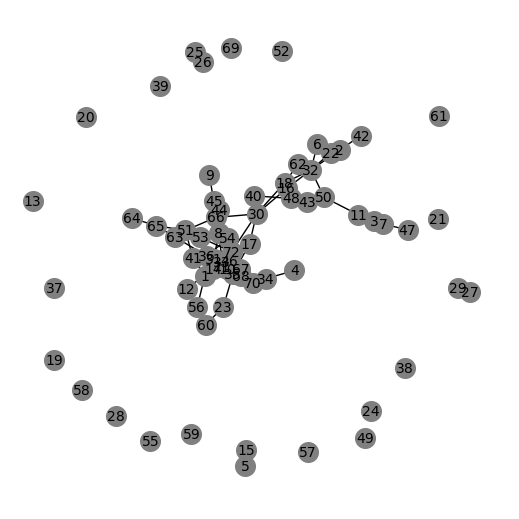

In [61]:
G = graph_dict['lt'][0][1]

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, node_size=200, font_size=10, node_color=[[0.5, 0.5, 0.5]])
plt.show()

In [85]:
# weight 정보 반영 여부

print("density :", nx.density(G))
print("average clustering :", nx.average_clustering(G))
print("transitivity :", nx.transitivity(G))

density : 0.041471048513302036
average clustering : 0.23472522847522848
transitivity : 0.4866412213740458


In [8]:
# weight -> distance
# weight는 클수록 가까운 관계 / distance는 작을수록 가까운 관계

G_distance = G.copy()
for n1,n2,edge_attr_dict in G_distance.edges(data=True):
    if 'distance' not in edge_attr_dict:
        edge_attr_dict['distance'] = 1.0/edge_attr_dict['weight'] # 1/weight = distance

In [ ]:
# degree 연결 중심성
nx.degree_centrality(G)

In [30]:
# betweenness 매개 중심성
# bet = nx.betweenness_centrality(G, weight='weight')
bet = nx.betweenness_centrality(G_distance, weight='distance', normalized=True)

<AxesSubplot:xlabel='Node_num', ylabel='Betweenness'>

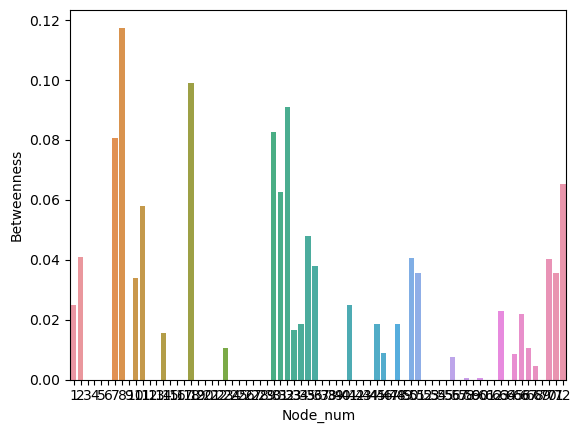

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

bet_df = pd.DataFrame(list(bet.items()), columns=['Node_num', 'Betweenness'])
sns.barplot(data=bet_df, x='Node_num', y='Betweenness')

In [17]:
# closeness 근접 중심성
clo = nx.closeness_centrality(G_distance, distance='distance')

In [48]:
# eigenvector 고유벡터 중심성
eig = nx.eigenvector_centrality(G_distance, weight='weight')

# 3-2. teneto 패키지 활용

In [ ]:
import teneto

In [41]:
# lt의 첫번째 환자의 teneto 패키지용 네트워크 객체 생성

edgelist = []
for t in range(6) :
    for i,j, weight in graph_dict['rt'][0][t].edges(data='weight') :
        edgelist.append([i, j, t, weight])

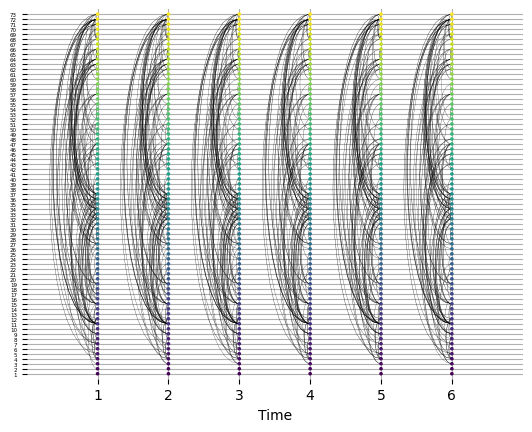

In [42]:
from teneto import TemporalNetwork
import matplotlib.pyplot as plt

tnet = TemporalNetwork(from_edgelist=edgelist, nettype='wu') # wu : weighted, undirected
tnet.plot('slice_plot', nodesize=2.5, plotedgeweights=True, edgeweightscalar=0.5)
# plt.xlabel("HC")
plt.yticks(fontsize=4)
plt.show()

In [18]:
print(tnet.nettype) # weighted undirected networks 

wu


# 4.  cor_matrix 데이터로 CNN을 통한 분류

# 4-1.  cor_matrix 데이터로 CNN을 통한 분류 : 데이터 가공

In [38]:
data = np.array(cor_dict['lt'] + cor_dict['rt'] + cor_dict['hc']) # shape : (데이터 수, 시점=6, 72, 72)

In [39]:
from keras.utils import np_utils

# 0 : lt, 1 : rt, 2 : hc
label = np.array(np.repeat([0,1,2], [len(cor_dict['lt']), len(cor_dict['rt']), len(cor_dict['hc'])], axis=0)) 
label = label.reshape(len(cor_dict['lt'])+len(cor_dict['rt'])+len(cor_dict['hc']),-1)

# 정답 데이터 one-hot vector 처리
label = np_utils.to_categorical(label)

In [ ]:
# 테스트 데이터 #
test_data = np.array(cor_test_dict['lt'] + cor_test_dict['rt'] + cor_test_dict['hc'])

# 0 : lt, 1 : rt, 2 : hc
test_label = np.array(np.repeat([0,1,2], [len(cor_test_dict['lt']), len(cor_test_dict['rt']), len(cor_test_dict['hc'])], axis=0)) 
test_label = test_label.reshape(len(cor_test_dict['lt'])+len(cor_test_dict['rt'])+len(cor_test_dict['hc']),-1)

# 정답 데이터 one-hot vector 처리
test_label = np_utils.to_categorical(test_label)

In [49]:
print(data.shape)
print(label.shape)
print(test_data.shape)
print(test_label.shape)

(81, 6, 72, 72)
(81, 3)
(9, 6, 72, 72)
(9, 3)


### <모델 훈련 데이터 가공> 코드 이해를 위한 참고용 코드
주석이나 출력 결과와 함께 살펴보기

#### 입력 데이터 가공 부분

In [32]:
print(len(cor_dict['lt'] + cor_dict['rt'] + cor_dict['hc']))
data = np.array(cor_dict['lt'] + cor_dict['rt'] + cor_dict['hc']) 

12


In [33]:
data.shape # (데이터 수, 시점, 72, 72)

(12, 6, 72, 72)

In [34]:
len(cor_dict['lt']) # lt 데이터 수

4

#### 정답 데이터 가공 부분

In [95]:
label = np.array(np.repeat([0,1,2], [len(cor_dict['lt']), len(cor_dict['rt']), len(cor_dict['hc'])], axis=0)) # 0 : lt, 1 : rt, 2 : hc
label = label.reshape(len(cor_dict['lt'])+len(cor_dict['rt'])+len(cor_dict['hc']),-1)
print(label)

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]]


In [96]:
from keras.utils import np_utils

# 정답 데이터 one-hot vector 처리
label = np_utils.to_categorical(label)

print(label)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


# 4-2. cor_matrix 데이터로 CNN을 통한 분류 : 모델링

In [48]:
import tensorflow as tf
import keras

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, TimeDistributed, Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization, Flatten, LSTM, Dense,GRU, Dropout, GlobalMaxPool2D
# from tensorflow.keras.optimizers import SGD

In [52]:
def build_convnet(shape=(72, 72, 1)):
    momentum = .9
    model = keras.Sequential()
    model.add(Conv2D(32, (3,3), input_shape=shape, padding='same', activation='relu')) # 64 -> 32
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization(momentum=momentum))
    
    model.add(MaxPool2D())
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu')) # 128 -> 64
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization(momentum=momentum))
    
    model.add(MaxPool2D())
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu')) # 256 -> 128
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization(momentum=momentum))
    
    # flatten
    model.add(GlobalMaxPool2D())
    return model

In [29]:
# start
model = Sequential()

# CNN
model.add(TimeDistributed(build_convnet(shape=(72,72,1)), input_shape=(6, 72, 72, 1)))

# GRU (Sequence)
model.add(GRU(64))

# Classification
model.add(Dense(512, activation='relu', kernel_initializer='he_normal')) # 512 -> 256
model.add(Dropout(.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal')) # 256 -> 128
model.add(Dropout(.5))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal')) # 128 -> 64
model.add(Dense(3, activation='softmax')) # final classification
    
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDis  (None, 6, 128)           287328    
 tributed)                                                       
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 512)               33280     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

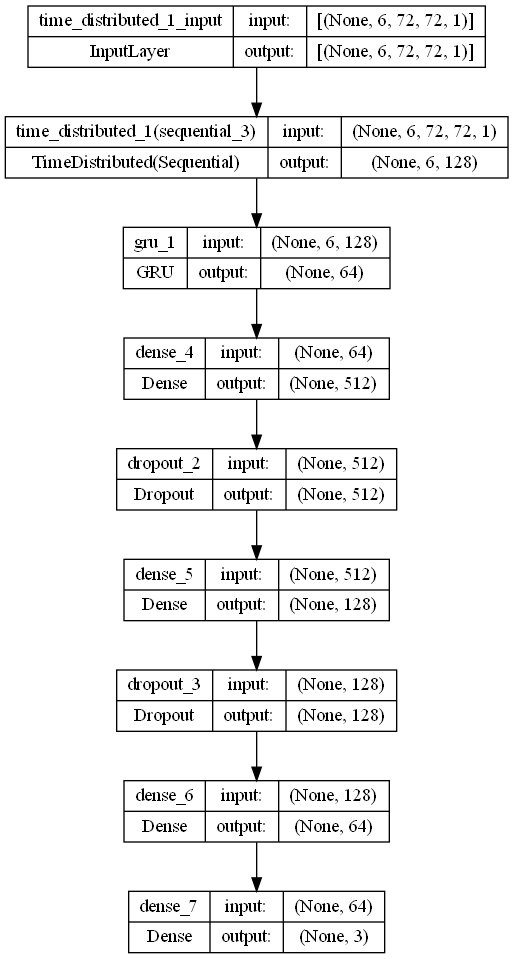

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [50]:
history = model.fit(x=data, y=label, batch_size=27, epochs=200, validation_data=(test_data, test_label), verbose=2)

Epoch 1/200
3/3 - 15s - loss: 1.3247 - accuracy: 0.4938 - val_loss: 1.1100 - val_accuracy: 0.3333 - 15s/epoch - 5s/step
Epoch 2/200
3/3 - 13s - loss: 1.0739 - accuracy: 0.5556 - val_loss: 1.1028 - val_accuracy: 0.3333 - 13s/epoch - 4s/step
Epoch 3/200
3/3 - 13s - loss: 0.9149 - accuracy: 0.5679 - val_loss: 1.1146 - val_accuracy: 0.3333 - 13s/epoch - 4s/step
Epoch 4/200
3/3 - 12s - loss: 0.8631 - accuracy: 0.6543 - val_loss: 1.1338 - val_accuracy: 0.3333 - 12s/epoch - 4s/step
Epoch 5/200
3/3 - 12s - loss: 0.6322 - accuracy: 0.7407 - val_loss: 1.1644 - val_accuracy: 0.2222 - 12s/epoch - 4s/step
Epoch 6/200
3/3 - 12s - loss: 0.5544 - accuracy: 0.7778 - val_loss: 0.9138 - val_accuracy: 0.6667 - 12s/epoch - 4s/step
Epoch 7/200
3/3 - 12s - loss: 0.4756 - accuracy: 0.7531 - val_loss: 0.6377 - val_accuracy: 0.6667 - 12s/epoch - 4s/step
Epoch 8/200
3/3 - 12s - loss: 0.5155 - accuracy: 0.7778 - val_loss: 0.6152 - val_accuracy: 0.5556 - 12s/epoch - 4s/step
Epoch 9/200
3/3 - 12s - loss: 0.4060 - a

Epoch 69/200
3/3 - 14s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.6124 - val_accuracy: 0.5556 - 14s/epoch - 5s/step
Epoch 70/200
3/3 - 15s - loss: 0.1000 - accuracy: 0.9630 - val_loss: 2.6120 - val_accuracy: 0.6667 - 15s/epoch - 5s/step
Epoch 71/200
3/3 - 13s - loss: 0.0643 - accuracy: 0.9753 - val_loss: 2.6182 - val_accuracy: 0.5556 - 13s/epoch - 4s/step
Epoch 72/200
3/3 - 13s - loss: 0.1345 - accuracy: 0.9877 - val_loss: 2.6574 - val_accuracy: 0.5556 - 13s/epoch - 4s/step
Epoch 73/200
3/3 - 13s - loss: 0.1547 - accuracy: 0.9630 - val_loss: 2.7610 - val_accuracy: 0.5556 - 13s/epoch - 4s/step
Epoch 74/200
3/3 - 15s - loss: 0.0427 - accuracy: 0.9877 - val_loss: 2.2726 - val_accuracy: 0.5556 - 15s/epoch - 5s/step
Epoch 75/200
3/3 - 14s - loss: 0.0758 - accuracy: 0.9630 - val_loss: 1.7594 - val_accuracy: 0.5556 - 14s/epoch - 5s/step
Epoch 76/200
3/3 - 12s - loss: 0.0906 - accuracy: 0.9630 - val_loss: 2.2962 - val_accuracy: 0.6667 - 12s/epoch - 4s/step
Epoch 77/200
3/3 - 13s - loss: 0

Epoch 136/200
3/3 - 15s - loss: 2.5290e-04 - accuracy: 1.0000 - val_loss: 2.2846 - val_accuracy: 0.7778 - 15s/epoch - 5s/step
Epoch 137/200
3/3 - 18s - loss: 3.7691e-04 - accuracy: 1.0000 - val_loss: 2.2903 - val_accuracy: 0.7778 - 18s/epoch - 6s/step
Epoch 138/200
3/3 - 20s - loss: 3.2284e-04 - accuracy: 1.0000 - val_loss: 2.2921 - val_accuracy: 0.7778 - 20s/epoch - 7s/step
Epoch 139/200
3/3 - 16s - loss: 2.3061e-04 - accuracy: 1.0000 - val_loss: 2.2940 - val_accuracy: 0.7778 - 16s/epoch - 5s/step
Epoch 140/200
3/3 - 14s - loss: 3.6569e-04 - accuracy: 1.0000 - val_loss: 2.3013 - val_accuracy: 0.7778 - 14s/epoch - 5s/step
Epoch 141/200
3/3 - 14s - loss: 8.2999e-04 - accuracy: 1.0000 - val_loss: 2.3005 - val_accuracy: 0.7778 - 14s/epoch - 5s/step
Epoch 142/200
3/3 - 15s - loss: 5.1750e-04 - accuracy: 1.0000 - val_loss: 2.3086 - val_accuracy: 0.7778 - 15s/epoch - 5s/step
Epoch 143/200
3/3 - 18s - loss: 7.4510e-04 - accuracy: 1.0000 - val_loss: 2.3198 - val_accuracy: 0.7778 - 18s/epoch - 

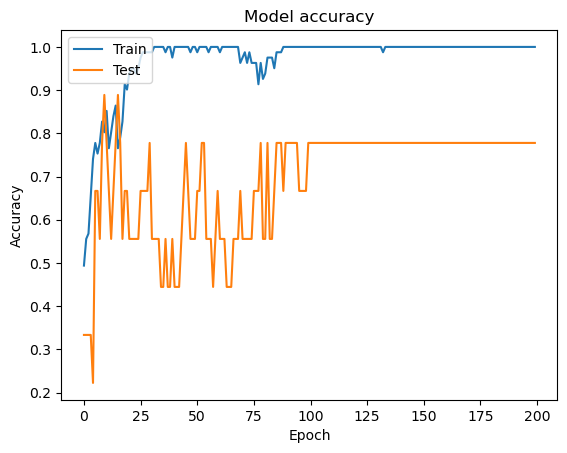

In [51]:
import matplotlib.pyplot as plt

# 정확도(accuracy) 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

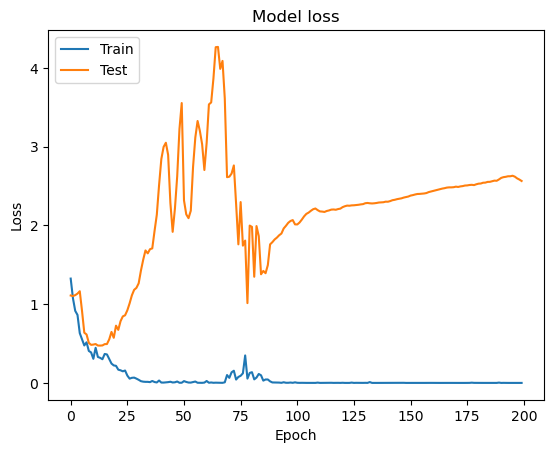

In [52]:
# 손실(loss) 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 4-3. cor_matrix 데이터로 CNN을 통한 분류 : 모델링 (K-Fold, earlystopping 적용)

epoch 50 전부터 test에 대한 정확도가 떨어지고, 그 이후로는 너무 낮은 것으로 보아 overfitting 발생  
너무 적은 epoch는 underfitting 발생, 너무 많은 epoch는 overfitting 발생  
=> Early Stopping : 특정 시점을 판단하여 중단  
=> Model Check Point : 가장 검증 성능이 좋은 모델 반환  

In [41]:
x = np.array(cor_dict['lt'] + cor_dict['rt'] + cor_dict['hc'])

In [42]:
from keras.utils import np_utils

# 0 : lt, 1 : rt, 2 : hc
y = np.array(np.repeat([0,1,2], [len(cor_dict['lt']), len(cor_dict['rt']), len(cor_dict['hc'])], axis=0)) 
y = y.reshape(len(cor_dict['lt'])+len(cor_dict['rt'])+len(cor_dict['hc']),-1)

# 정답 데이터 one-hot vector 처리
y = np_utils.to_categorical(y)

In [43]:
print(x.shape)
print(y.shape)

(90, 6, 72, 72)
(90, 3)


In [11]:
from sklearn.model_selection import KFold
k = 10
kfold = KFold(n_splits=k, shuffle=True)

acc_score = [] # 정확도를 정리할 리스트
cf_matrix = [] # 혼동행렬을 정리할 리스트

In [44]:
# k겹 때마다 생성할 모델
def model_fn() :
    model = Sequential()
    
    # CNN
    model.add(TimeDistributed(build_convnet(shape=(72,72,1)), input_shape=(6, 72, 72, 1)))

    # GRU (Sequence)
    model.add(GRU(64))

    # Classification
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal')) # 512 -> 256
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal')) # 256 -> 128
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal')) # 128 -> 64
    model.add(Dense(3, activation='softmax')) # final classification
    
    return model

In [45]:
# k겹 때마다 가장 좋은 모델을 저장하기 위한 파일 이름
def get_model_name(k):
    return '/best/cnn_best/model_'+str(k)+'.h5'

In [18]:
%%time

# 앞에 keras 관련 import문이랑 build_convnet 사용자정의함수 돌리고 실행하기
# 거의 4시간 소요

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

fold_val = 1
for train_index, test_index in kfold.split(x) : 
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # create new model
    model = model_fn()
    # compile new model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    
    
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50) 
    mc = ModelCheckpoint(get_model_name(fold_val), monitor='val_loss', mode='min',  
                         save_best_only=True, verbose = 1)
    history = model.fit(x=x_train, y=y_train, batch_size=27, epochs=200, verbose=0,
                       callbacks=[es, mc], validation_data=(x_test, y_test))
    
    model.load_weights("/best/cnn_best/model_"+str(fold_val)+".h5")
    
    accuracy = model.evaluate(x_test, y_test)[1]
    acc_score.append(accuracy)
    
    # 혼동행렬
    y_pred = model.predict(x_test).argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    cf_matrix.append(confusion_matrix(y_true, y_pred))
    
    tf.keras.backend.clear_session()
    
    fold_val += 1


Epoch 1: val_loss improved from inf to 1.08440, saving model to /best/cnn_best\model_1.h5

Epoch 2: val_loss improved from 1.08440 to 1.07223, saving model to /best/cnn_best\model_1.h5

Epoch 3: val_loss improved from 1.07223 to 1.06762, saving model to /best/cnn_best\model_1.h5

Epoch 4: val_loss did not improve from 1.06762

Epoch 5: val_loss did not improve from 1.06762

Epoch 6: val_loss did not improve from 1.06762

Epoch 7: val_loss improved from 1.06762 to 1.01113, saving model to /best/cnn_best\model_1.h5

Epoch 8: val_loss improved from 1.01113 to 0.97726, saving model to /best/cnn_best\model_1.h5

Epoch 9: val_loss improved from 0.97726 to 0.69855, saving model to /best/cnn_best\model_1.h5

Epoch 10: val_loss improved from 0.69855 to 0.49865, saving model to /best/cnn_best\model_1.h5

Epoch 11: val_loss improved from 0.49865 to 0.42707, saving model to /best/cnn_best\model_1.h5

Epoch 12: val_loss improved from 0.42707 to 0.40596, saving model to /best/cnn_best\model_1.h5

E


Epoch 20: val_loss did not improve from 0.34957

Epoch 21: val_loss did not improve from 0.34957

Epoch 22: val_loss did not improve from 0.34957

Epoch 23: val_loss did not improve from 0.34957

Epoch 24: val_loss did not improve from 0.34957

Epoch 25: val_loss did not improve from 0.34957

Epoch 26: val_loss did not improve from 0.34957

Epoch 27: val_loss did not improve from 0.34957

Epoch 28: val_loss did not improve from 0.34957

Epoch 29: val_loss did not improve from 0.34957

Epoch 30: val_loss did not improve from 0.34957

Epoch 31: val_loss did not improve from 0.34957

Epoch 32: val_loss did not improve from 0.34957

Epoch 33: val_loss did not improve from 0.34957

Epoch 34: val_loss did not improve from 0.34957

Epoch 35: val_loss did not improve from 0.34957

Epoch 36: val_loss did not improve from 0.34957

Epoch 37: val_loss did not improve from 0.34957

Epoch 38: val_loss did not improve from 0.34957

Epoch 39: val_loss did not improve from 0.34957

Epoch 40: val_loss 


Epoch 31: val_loss did not improve from 0.01298

Epoch 32: val_loss did not improve from 0.01298

Epoch 33: val_loss did not improve from 0.01298

Epoch 34: val_loss did not improve from 0.01298

Epoch 35: val_loss did not improve from 0.01298

Epoch 36: val_loss improved from 0.01298 to 0.00209, saving model to /best/cnn_best\model_5.h5

Epoch 37: val_loss improved from 0.00209 to 0.00136, saving model to /best/cnn_best\model_5.h5

Epoch 38: val_loss improved from 0.00136 to 0.00062, saving model to /best/cnn_best\model_5.h5

Epoch 39: val_loss improved from 0.00062 to 0.00041, saving model to /best/cnn_best\model_5.h5

Epoch 40: val_loss improved from 0.00041 to 0.00025, saving model to /best/cnn_best\model_5.h5

Epoch 41: val_loss did not improve from 0.00025

Epoch 42: val_loss did not improve from 0.00025

Epoch 43: val_loss did not improve from 0.00025

Epoch 44: val_loss did not improve from 0.00025

Epoch 45: val_loss did not improve from 0.00025

Epoch 46: val_loss did not im


Epoch 11: val_loss did not improve from 0.23549

Epoch 12: val_loss did not improve from 0.23549

Epoch 13: val_loss did not improve from 0.23549

Epoch 14: val_loss did not improve from 0.23549

Epoch 15: val_loss did not improve from 0.23549

Epoch 16: val_loss did not improve from 0.23549

Epoch 17: val_loss did not improve from 0.23549

Epoch 18: val_loss did not improve from 0.23549

Epoch 19: val_loss did not improve from 0.23549

Epoch 20: val_loss did not improve from 0.23549

Epoch 21: val_loss did not improve from 0.23549

Epoch 22: val_loss did not improve from 0.23549

Epoch 23: val_loss did not improve from 0.23549

Epoch 24: val_loss did not improve from 0.23549

Epoch 25: val_loss did not improve from 0.23549

Epoch 26: val_loss did not improve from 0.23549

Epoch 27: val_loss did not improve from 0.23549

Epoch 28: val_loss did not improve from 0.23549

Epoch 29: val_loss did not improve from 0.23549

Epoch 30: val_loss did not improve from 0.23549

Epoch 31: val_loss 


Epoch 37: val_loss did not improve from 0.30791

Epoch 38: val_loss improved from 0.30791 to 0.23236, saving model to /best/cnn_best\model_8.h5

Epoch 39: val_loss improved from 0.23236 to 0.18245, saving model to /best/cnn_best\model_8.h5

Epoch 40: val_loss did not improve from 0.18245

Epoch 41: val_loss improved from 0.18245 to 0.07297, saving model to /best/cnn_best\model_8.h5

Epoch 42: val_loss did not improve from 0.07297

Epoch 43: val_loss did not improve from 0.07297

Epoch 44: val_loss did not improve from 0.07297

Epoch 45: val_loss did not improve from 0.07297

Epoch 46: val_loss did not improve from 0.07297

Epoch 47: val_loss did not improve from 0.07297

Epoch 48: val_loss did not improve from 0.07297

Epoch 49: val_loss did not improve from 0.07297

Epoch 50: val_loss did not improve from 0.07297

Epoch 51: val_loss did not improve from 0.07297

Epoch 52: val_loss improved from 0.07297 to 0.03347, saving model to /best/cnn_best\model_8.h5

Epoch 53: val_loss did not 

Epoch 86: early stopping
1/1 [==============================] - 0s 257ms/step - loss: 0.1706 - accuracy: 0.8889

Epoch 1: val_loss improved from inf to 1.09493, saving model to /best/cnn_best\model_10.h5

Epoch 2: val_loss did not improve from 1.09493

Epoch 3: val_loss did not improve from 1.09493

Epoch 4: val_loss did not improve from 1.09493

Epoch 5: val_loss improved from 1.09493 to 1.05247, saving model to /best/cnn_best\model_10.h5

Epoch 6: val_loss improved from 1.05247 to 1.04940, saving model to /best/cnn_best\model_10.h5

Epoch 7: val_loss did not improve from 1.04940

Epoch 8: val_loss improved from 1.04940 to 0.97539, saving model to /best/cnn_best\model_10.h5

Epoch 9: val_loss improved from 0.97539 to 0.80473, saving model to /best/cnn_best\model_10.h5

Epoch 10: val_loss improved from 0.80473 to 0.74188, saving model to /best/cnn_best\model_10.h5

Epoch 11: val_loss improved from 0.74188 to 0.58602, saving model to /best/cnn_best\model_10.h5

Epoch 12: val_loss improv

In [39]:
# k번 계산된 정확도의 평균
avg_acc_score = sum(acc_score) / k

print('정확도 :', acc_score)
print('정확도 평균 :', avg_acc_score)

정확도 : [0.7777777910232544, 0.7777777910232544, 0.8888888955116272, 0.7777777910232544, 1.0, 0.7777777910232544, 1.0, 0.8888888955116272, 0.8888888955116272, 0.8888888955116272]
정확도 평균 : 0.8666666746139526


### <cor_matrix 데이터로 CNN을 통한 분류> 코드 이해를 위한 참고용 코드
주석이나 출력 결과와 함께 살펴보기

#### keras, tensorflow import 에러 확인을 위한 부분

In [8]:
import tensorflow as tf

In [9]:
print(tf.__version__)

2.10.0


In [10]:
import keras

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import SGD

In [12]:
num_filters = 5
kernel_size = 4

In [13]:
model = Sequential()
model.add(keras.Input(shape=(150,150,3)))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))

sgd = SGD(learning_rate=0.01, nesterov=True, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

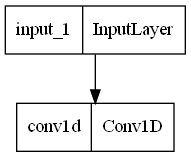

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model)

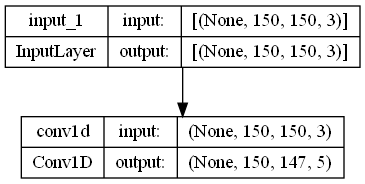

In [15]:
plot_model(model, show_shapes=True)

# 5. temporal centrality 허브 노드로 RNN을 통한 분류

# 5-1. temporal centrality 허브 노드로 RNN을 통한 분류 : 데이터 가공

In [9]:
def make_hubnode_vector(G) :
    
    hub_vector = []

    G_distance = G.copy()
    for n1,n2,edge_attr_dict in G_distance.edges(data=True):
        if 'distance' not in edge_attr_dict:
            edge_attr_dict['distance'] = 1.0/edge_attr_dict['weight'] # 1/weight = distance
            
    deg = dict(G.degree(weight='weight'))
    bet = nx.betweenness_centrality(G_distance, weight='distance', normalized=True)
    clo = nx.closeness_centrality(G_distance, distance='distance')
    # eig = nx.eigenvector_centrality(G_distance, weight='weight') # converge error 뜨기도. max_iter 늘려봐야 할 듯

    hub_vector = \
    sorted(deg, key=lambda x:deg[x], reverse=True)[:3] + \
    sorted(bet, key=bet.get, reverse=True)[:3] + \
    sorted(clo, key=clo.get, reverse=True)[:3] # + \
    # sorted(eig, key=eig.get, reverse=True)[:3]
    
    return hub_vector

In [21]:
data = []

time_len = len(graph_dict['lt'][0])

for i in range(len(graph_dict['lt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_dict['lt'][i][j]))
    data.append(time_series_vector)
    
for i in range(len(graph_dict['rt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_dict['rt'][i][j]))
    data.append(time_series_vector)

for i in range(len(graph_dict['hc'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_dict['hc'][i][j]))
    data.append(time_series_vector)
    
data = np.array(data)

In [22]:
test_data = []

time_len = len(graph_test_dict['lt'][0])

for i in range(len(graph_test_dict['lt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_test_dict['lt'][i][j]))
    test_data.append(time_series_vector)
    
for i in range(len(graph_test_dict['rt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_test_dict['rt'][i][j]))
    test_data.append(time_series_vector)

for i in range(len(graph_test_dict['hc'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_test_dict['hc'][i][j]))
    test_data.append(time_series_vector)
    
test_data = np.array(test_data)

In [104]:
# CNN 정답 데이터 처리와 동일

from keras.utils import np_utils

# 0 : lt, 1 : rt, 2 : hc
label = np.array(np.repeat([0,1,2], [len(cor_dict['lt']), len(cor_dict['rt']), len(cor_dict['hc'])], axis=0)) 
label = label.reshape(len(cor_dict['lt'])+len(cor_dict['rt'])+len(cor_dict['hc']),-1)

# 정답 데이터 one-hot vector 처리
label = np_utils.to_categorical(label)

# 0 : lt, 1 : rt, 2 : hc
test_label = np.array(np.repeat([0,1,2], [len(cor_test_dict['lt']), len(cor_test_dict['rt']), len(cor_test_dict['hc'])], axis=0)) 
test_label = test_label.reshape(len(cor_test_dict['lt'])+len(cor_test_dict['rt'])+len(cor_test_dict['hc']),-1)

# 정답 데이터 one-hot vector 처리
test_label = np_utils.to_categorical(test_label)

### <모델 훈련 데이터 가공> 코드 이해를 위한 참고용 코드
주석이나 출력 결과와 함께 살펴보기

#### 입력 데이터 가공 부분

In [63]:
sorted(deg, key=lambda x:deg[x], reverse=True)[:3] + \
    sorted(bet, key=bet.get, reverse=True)[:3] + \
    sorted(clo, key=clo.get, reverse=True)[:3] + \
    sorted(eig, key=eig.get, reverse=True)[:3]

[33, 10, 71, 8, 18, 32, 71, 10, 31, 33, 10, 71]

#### 정답 데이터 가공 부분 - CNN과 동일

# 5-2. temporal centrality 허브 노드로 RNN을 통한 분류 : 모델링

In [24]:
import tensorflow as tf
import keras

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD

In [61]:
model = Sequential()

# GRU (Sequence)
model.add(GRU(units=64, activation='relu', return_sequences=True, input_shape = (len(data[0]), len(data[0][0]))))
model.add(Dropout(0.2))

model.add(GRU(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=128, activation='relu'))
model.add(Dropout(0.2))

# Classification
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) # final classification
    
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 6, 64)             14400     
                                                                 
 dropout_4 (Dropout)         (None, 6, 64)             0         
                                                                 
 gru_3 (GRU)                 (None, 6, 80)             35040     
                                                                 
 dropout_5 (Dropout)         (None, 6, 80)             0         
                                                                 
 gru_4 (GRU)                 (None, 128)               80640     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1024)             

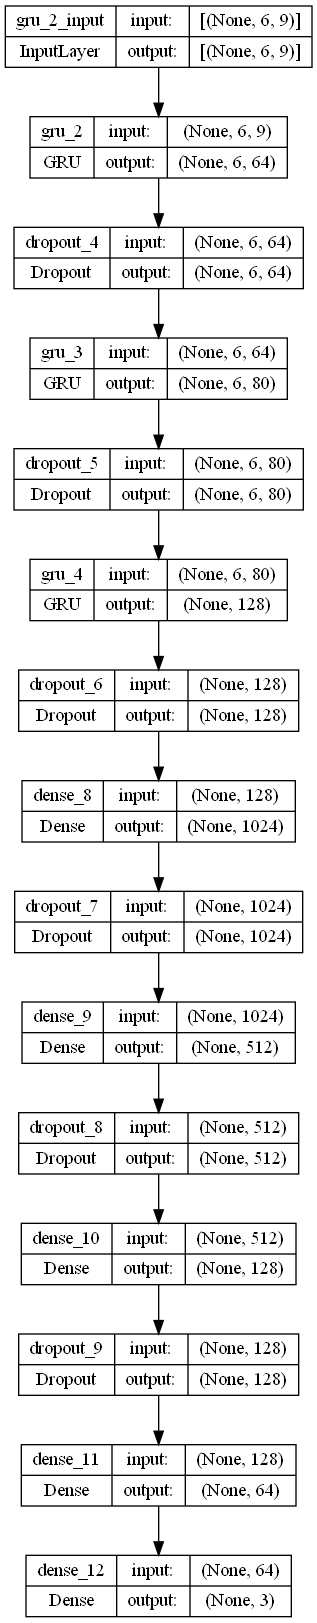

In [60]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [62]:
history = model.fit(x=data, y=label, batch_size=27, epochs=200, validation_data=(test_data, test_label), verbose=0)

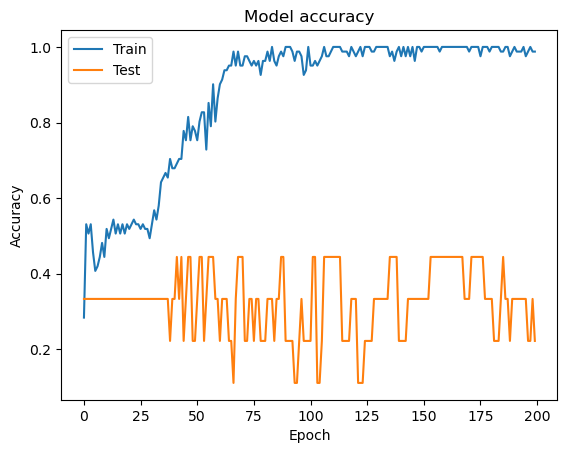

In [63]:
import matplotlib.pyplot as plt

# 정확도(accuracy) 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

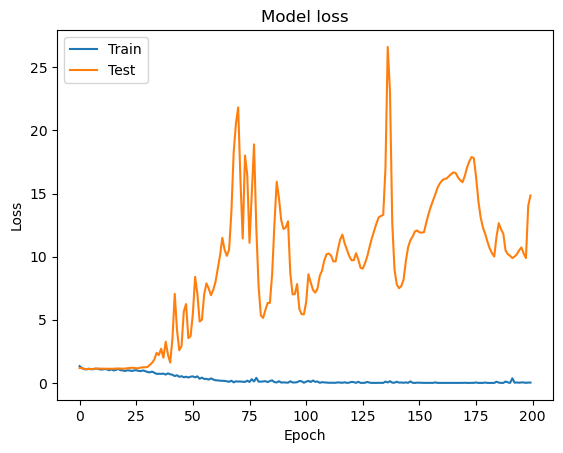

In [64]:
# 손실(loss) 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### <temporal centrality 허브 노드로 RNN을 통한 분류> 코드 이해를 위한 참고용 코드
주석이나 출력 결과와 함께 살펴보기

In [100]:
print(len(data))
print(len(data[0]))
print(len(data[0][0]))

30
6
9


# 5-3. temporal centrality 허브 노드로 RNN을 통한 분류 : 정수 범주형 -> 임베딩 레이어 추가 모델링
데이터 가공은 5-1 data에서 수정

허브 노드 = 정수 1~72 -> 실제로는 카테고리 수가 72개인 범주형 변수인 각 hub node를 인공신경망에서 처리하기 위해 임베딩 레이어 추가

In [23]:
# 노드 번호가 1~72인데, 임베딩이 0~71이라서 아래 오류 발생
f = lambda x: x - 1
data = f(data)
test_data = f(test_data)

In [39]:
import tensorflow as tf
import keras

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Reshape, GRU, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD

In [155]:
def build_embednet(shape=9):
    model = Sequential()
    model.add(Embedding(input_dim=72, output_dim=2, input_length=shape))
    model.add(Reshape(target_shape=(-1,)))

    return model

model = Sequential()

model.add(TimeDistributed(build_embednet(9), input_shape=(6, 9))) ### weights = [], trainable=False

# GRU (Sequence)
model.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2, activation='relu', return_sequences=True,
              input_shape = (len(data[0]), len(data[0][0]))))

model.add(GRU(units=80, dropout=0.2, recurrent_dropout=0.2, activation='relu')) # , return_sequences=True

# Classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(3, activation='softmax')) # final classification
    
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [156]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeDi  (None, 6, 18)            144       
 stributed)                                                      
                                                                 
 gru_39 (GRU)                (None, 6, 64)             16128     
                                                                 
 gru_40 (GRU)                (None, 80)                35040     
                                                                 
 dense_57 (Dense)            (None, 128)               10368     
                                                                 
 dropout_59 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                     

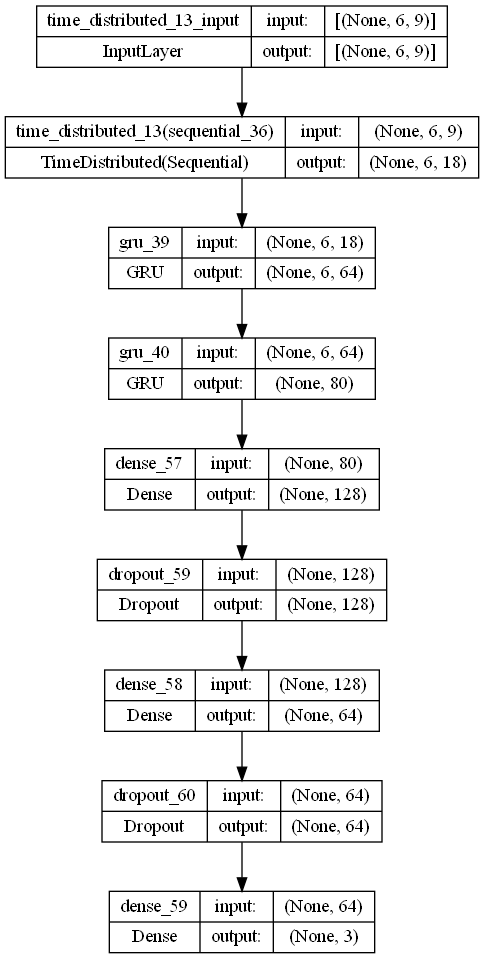

In [157]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [158]:
history = model.fit(x=data, y=label, batch_size=27, epochs=200, validation_data=(test_data, test_label), verbose=2)

Epoch 1/200
3/3 - 6s - loss: 1.0956 - accuracy: 0.4321 - val_loss: 1.0984 - val_accuracy: 0.3333 - 6s/epoch - 2s/step
Epoch 2/200
3/3 - 0s - loss: 1.0844 - accuracy: 0.5309 - val_loss: 1.0992 - val_accuracy: 0.3333 - 72ms/epoch - 24ms/step
Epoch 3/200
3/3 - 0s - loss: 1.0699 - accuracy: 0.5309 - val_loss: 1.1011 - val_accuracy: 0.3333 - 81ms/epoch - 27ms/step
Epoch 4/200
3/3 - 0s - loss: 1.0529 - accuracy: 0.5309 - val_loss: 1.1053 - val_accuracy: 0.3333 - 80ms/epoch - 27ms/step
Epoch 5/200
3/3 - 0s - loss: 1.0407 - accuracy: 0.5309 - val_loss: 1.1166 - val_accuracy: 0.3333 - 77ms/epoch - 26ms/step
Epoch 6/200
3/3 - 0s - loss: 1.0113 - accuracy: 0.5309 - val_loss: 1.1408 - val_accuracy: 0.3333 - 80ms/epoch - 27ms/step
Epoch 7/200
3/3 - 0s - loss: 0.9846 - accuracy: 0.5309 - val_loss: 1.1779 - val_accuracy: 0.3333 - 81ms/epoch - 27ms/step
Epoch 8/200
3/3 - 0s - loss: 0.9797 - accuracy: 0.5309 - val_loss: 1.1964 - val_accuracy: 0.3333 - 82ms/epoch - 27ms/step
Epoch 9/200
3/3 - 0s - loss:

Epoch 68/200
3/3 - 0s - loss: 0.3125 - accuracy: 0.8272 - val_loss: 0.5518 - val_accuracy: 0.6667 - 98ms/epoch - 33ms/step
Epoch 69/200
3/3 - 0s - loss: 0.2778 - accuracy: 0.9136 - val_loss: 0.5405 - val_accuracy: 0.5556 - 105ms/epoch - 35ms/step
Epoch 70/200
3/3 - 0s - loss: 0.2895 - accuracy: 0.8519 - val_loss: 0.5435 - val_accuracy: 0.5556 - 99ms/epoch - 33ms/step
Epoch 71/200
3/3 - 0s - loss: 0.3332 - accuracy: 0.8272 - val_loss: 0.5411 - val_accuracy: 0.5556 - 98ms/epoch - 33ms/step
Epoch 72/200
3/3 - 0s - loss: 0.2568 - accuracy: 0.8765 - val_loss: 0.5508 - val_accuracy: 0.6667 - 100ms/epoch - 33ms/step
Epoch 73/200
3/3 - 0s - loss: 0.2806 - accuracy: 0.8642 - val_loss: 0.5629 - val_accuracy: 0.6667 - 100ms/epoch - 33ms/step
Epoch 74/200
3/3 - 0s - loss: 0.2679 - accuracy: 0.9012 - val_loss: 0.5680 - val_accuracy: 0.6667 - 98ms/epoch - 33ms/step
Epoch 75/200
3/3 - 0s - loss: 0.2499 - accuracy: 0.8765 - val_loss: 0.5703 - val_accuracy: 0.6667 - 108ms/epoch - 36ms/step
Epoch 76/200

3/3 - 0s - loss: 0.0369 - accuracy: 1.0000 - val_loss: 1.0830 - val_accuracy: 0.7778 - 100ms/epoch - 33ms/step
Epoch 135/200
3/3 - 0s - loss: 0.0551 - accuracy: 0.9753 - val_loss: 1.1632 - val_accuracy: 0.6667 - 93ms/epoch - 31ms/step
Epoch 136/200
3/3 - 0s - loss: 0.0477 - accuracy: 0.9753 - val_loss: 1.0977 - val_accuracy: 0.7778 - 103ms/epoch - 34ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0406 - accuracy: 0.9877 - val_loss: 1.0965 - val_accuracy: 0.6667 - 99ms/epoch - 33ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0656 - accuracy: 0.9630 - val_loss: 1.0938 - val_accuracy: 0.6667 - 104ms/epoch - 35ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0727 - accuracy: 0.9630 - val_loss: 0.9989 - val_accuracy: 0.6667 - 180ms/epoch - 60ms/step
Epoch 140/200
3/3 - 0s - loss: 0.1025 - accuracy: 0.9753 - val_loss: 1.0618 - val_accuracy: 0.7778 - 175ms/epoch - 58ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0411 - accuracy: 0.9877 - val_loss: 1.3229 - val_accuracy: 0.6667 - 156ms/epoch - 52ms/step
Epoch 142/200
3/

Epoch 200/200
3/3 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.2372 - val_accuracy: 0.6667 - 96ms/epoch - 32ms/step


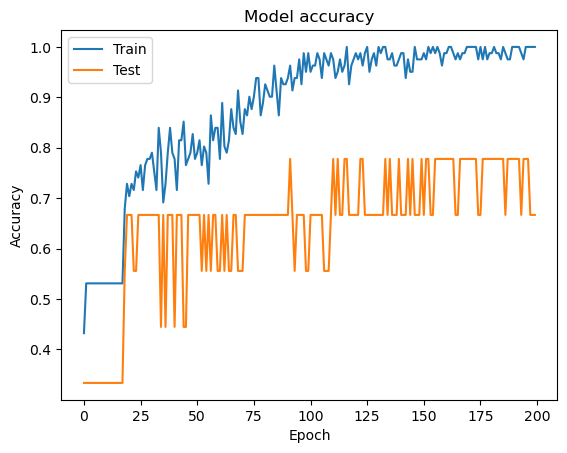

In [159]:
import matplotlib.pyplot as plt

# 정확도(accuracy) 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

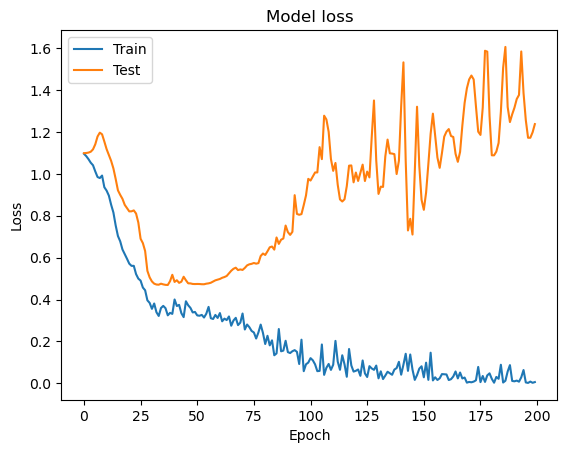

In [160]:
# 손실(loss) 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### <temporal centrality 허브 노드로 RNN을 통한 분류 임베딩 레이어> 코드 이해를 위한 참고용 코드
주석이나 출력 결과와 함께 살펴보기

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Reshape

In [44]:
# (예제 데이터) 한 사람 데이터로, 3 시점 & 시점별 허브노드 5개
ex = np.array(
    [[2,3,4,4,3],
    [2,1,2,3,4],
    [6,5,3,5,3]]
)
ex.shape

(3, 5)

In [46]:
model = Sequential()
embedding_layer = Embedding(input_dim=10,output_dim=4,input_length=5) # input_dim : 허브 노드 후보 수 (72, 여기선 10) / input_length : 뽑는 허브노드 수
model.add(embedding_layer)
reshape_layer = Reshape(target_shape=(-1,))
model.add(reshape_layer)

ex_out = model.predict(ex)

1/1 [==============================] - 0s 132ms/step


In [48]:
print(ex_out.shape) # 한 사람 데이터로, 3 시점 & 허브노드 5개*길이4 임베딩
ex_out

(3, 20)


array([[-0.03612288,  0.04258363, -0.0250525 ,  0.04428041, -0.0058722 ,
        -0.01651297,  0.00831098,  0.02193424, -0.01478529,  0.02403185,
        -0.00149133,  0.02835438, -0.01478529,  0.02403185, -0.00149133,
         0.02835438, -0.0058722 , -0.01651297,  0.00831098,  0.02193424],
       [-0.03612288,  0.04258363, -0.0250525 ,  0.04428041,  0.03244677,
         0.04392049,  0.0494936 , -0.0372634 , -0.03612288,  0.04258363,
        -0.0250525 ,  0.04428041, -0.0058722 , -0.01651297,  0.00831098,
         0.02193424, -0.01478529,  0.02403185, -0.00149133,  0.02835438],
       [ 0.02213253, -0.04850329,  0.03761876, -0.00660308,  0.02016431,
         0.04499969, -0.03123937,  0.0162136 , -0.0058722 , -0.01651297,
         0.00831098,  0.02193424,  0.02016431,  0.04499969, -0.03123937,
         0.0162136 , -0.0058722 , -0.01651297,  0.00831098,  0.02193424]],
      dtype=float32)

# 5-4. temporal centrality 허브 노드로 RNN을 통한 분류 : 정수 범주형 -> 임베딩 레이어 추가 모델링 (K-Fold, earlystopping 적용)

In [ ]:
# 5-1 def make_hubnode_vector 먼저 실행하기, 5-2. import keras 실행하기

In [10]:
x = []

time_len = len(graph_dict['lt'][0])

for i in range(len(graph_dict['lt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_dict['lt'][i][j]))
    x.append(time_series_vector)
    
for i in range(len(graph_dict['rt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_dict['rt'][i][j]))
    x.append(time_series_vector)

for i in range(len(graph_dict['hc'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_hubnode_vector(graph_dict['hc'][i][j]))
    x.append(time_series_vector)
    
x = np.array(x)


# 노드 번호가 1~72인데, 임베딩이 0~71이라서 아래 오류나는 듯
f = lambda x: x - 1
x = f(x)

In [11]:
from keras.utils import np_utils

# 0 : lt, 1 : rt, 2 : hc
y = np.array(np.repeat([0,1,2], [len(cor_dict['lt']), len(cor_dict['rt']), len(cor_dict['hc'])], axis=0)) 
y = y.reshape(len(cor_dict['lt'])+len(cor_dict['rt'])+len(cor_dict['hc']),-1)

# 정답 데이터 one-hot vector 처리
y = np_utils.to_categorical(y)

In [12]:
print(x.shape)
print(y.shape)

(90, 6, 9)
(90, 3)


In [46]:
from sklearn.model_selection import KFold
k = 10
kfold = KFold(n_splits=k, shuffle=True)

acc_score = [] # 정확도를 정리할 리스트
cf_matrix = [] # 혼동행렬을 정리할 리스트

In [13]:
def build_embednet(shape=9):
    model = Sequential()
    model.add(Embedding(input_dim=72, output_dim=2, input_length=shape))
    model.add(Reshape(target_shape=(-1,)))
    return model

In [14]:
# k겹 때마다 생성할 모델
def model_fn() :
    model = Sequential()

    model.add(TimeDistributed(build_embednet(9), input_shape=(6, 9))) 

    # GRU (Sequence)
    model.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2, activation='relu', return_sequences=True,
                  input_shape = (len(x[0]), len(x[0][0]))))

    model.add(GRU(units=80, dropout=0.2, recurrent_dropout=0.2, activation='relu')) # , return_sequences=True

    # Classification
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(3, activation='softmax')) # final classification
    
    return model

In [15]:
# k겹 때마다 가장 좋은 모델을 저장하기 위한 파일 이름
def get_model_name(k):
    return '/best/hubrnn_best/model_'+str(k)+'.h5'

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, LSTM, Dense, Dropout, Flatten, TimeDistributed, Embedding, Reshape
from tensorflow.keras.optimizers import SGD

import tensorflow as tf
import keras

In [47]:
%%time

# 앞에 keras 관련 import문이랑 사용자정의함수 돌리고 실행하기

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix # 혼동행렬

fold_val = 1
for train_index, test_index in kfold.split(x) : 
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # create new model
    model = model_fn()
    # compile new model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    
    
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50) 
    mc = ModelCheckpoint(get_model_name(fold_val), monitor='val_loss', mode='min',  
                         save_best_only=True, verbose = 1)
    history = model.fit(x=x_train, y=y_train, batch_size=27, epochs=200, verbose=0,
                       callbacks=[es, mc], validation_data=(x_test, y_test))
    
    model.load_weights("/best/hubrnn_best/model_"+str(fold_val)+".h5")
    
    accuracy = model.evaluate(x_test, y_test)[1]
    acc_score.append(accuracy)
    
    # 혼동행렬
    y_pred = model.predict(x_test).argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    cf_matrix.append(confusion_matrix(y_true, y_pred))
    
    tf.keras.backend.clear_session()
    
    fold_val += 1


Epoch 1: val_loss improved from inf to 1.08203, saving model to /best/hubrnn_best\model_1.h5

Epoch 2: val_loss improved from 1.08203 to 1.06213, saving model to /best/hubrnn_best\model_1.h5

Epoch 3: val_loss improved from 1.06213 to 1.03479, saving model to /best/hubrnn_best\model_1.h5

Epoch 4: val_loss improved from 1.03479 to 0.99892, saving model to /best/hubrnn_best\model_1.h5

Epoch 5: val_loss improved from 0.99892 to 0.96244, saving model to /best/hubrnn_best\model_1.h5

Epoch 6: val_loss improved from 0.96244 to 0.92248, saving model to /best/hubrnn_best\model_1.h5

Epoch 7: val_loss improved from 0.92248 to 0.89135, saving model to /best/hubrnn_best\model_1.h5

Epoch 8: val_loss improved from 0.89135 to 0.86771, saving model to /best/hubrnn_best\model_1.h5

Epoch 9: val_loss improved from 0.86771 to 0.84526, saving model to /best/hubrnn_best\model_1.h5

Epoch 10: val_loss improved from 0.84526 to 0.81895, saving model to /best/hubrnn_best\model_1.h5

Epoch 11: val_loss imp


Epoch 22: val_loss improved from 0.48793 to 0.46686, saving model to /best/hubrnn_best\model_2.h5

Epoch 23: val_loss improved from 0.46686 to 0.45060, saving model to /best/hubrnn_best\model_2.h5

Epoch 24: val_loss improved from 0.45060 to 0.43966, saving model to /best/hubrnn_best\model_2.h5

Epoch 25: val_loss improved from 0.43966 to 0.42695, saving model to /best/hubrnn_best\model_2.h5

Epoch 26: val_loss improved from 0.42695 to 0.41051, saving model to /best/hubrnn_best\model_2.h5

Epoch 27: val_loss improved from 0.41051 to 0.40272, saving model to /best/hubrnn_best\model_2.h5

Epoch 28: val_loss improved from 0.40272 to 0.39354, saving model to /best/hubrnn_best\model_2.h5

Epoch 29: val_loss improved from 0.39354 to 0.39096, saving model to /best/hubrnn_best\model_2.h5

Epoch 30: val_loss did not improve from 0.39096

Epoch 31: val_loss did not improve from 0.39096

Epoch 32: val_loss did not improve from 0.39096

Epoch 33: val_loss did not improve from 0.39096

Epoch 34: v


Epoch 25: val_loss improved from 0.62426 to 0.60169, saving model to /best/hubrnn_best\model_3.h5

Epoch 26: val_loss did not improve from 0.60169

Epoch 27: val_loss improved from 0.60169 to 0.57349, saving model to /best/hubrnn_best\model_3.h5

Epoch 28: val_loss improved from 0.57349 to 0.54176, saving model to /best/hubrnn_best\model_3.h5

Epoch 29: val_loss improved from 0.54176 to 0.53678, saving model to /best/hubrnn_best\model_3.h5

Epoch 30: val_loss did not improve from 0.53678

Epoch 31: val_loss improved from 0.53678 to 0.51532, saving model to /best/hubrnn_best\model_3.h5

Epoch 32: val_loss did not improve from 0.51532

Epoch 33: val_loss improved from 0.51532 to 0.51053, saving model to /best/hubrnn_best\model_3.h5

Epoch 34: val_loss did not improve from 0.51053

Epoch 35: val_loss did not improve from 0.51053

Epoch 36: val_loss did not improve from 0.51053

Epoch 37: val_loss did not improve from 0.51053

Epoch 38: val_loss improved from 0.51053 to 0.47961, saving mo


Epoch 5: val_loss improved from 1.01822 to 0.97709, saving model to /best/hubrnn_best\model_5.h5

Epoch 6: val_loss improved from 0.97709 to 0.92502, saving model to /best/hubrnn_best\model_5.h5

Epoch 7: val_loss improved from 0.92502 to 0.87477, saving model to /best/hubrnn_best\model_5.h5

Epoch 8: val_loss improved from 0.87477 to 0.81993, saving model to /best/hubrnn_best\model_5.h5

Epoch 9: val_loss improved from 0.81993 to 0.78123, saving model to /best/hubrnn_best\model_5.h5

Epoch 10: val_loss improved from 0.78123 to 0.73926, saving model to /best/hubrnn_best\model_5.h5

Epoch 11: val_loss improved from 0.73926 to 0.71409, saving model to /best/hubrnn_best\model_5.h5

Epoch 12: val_loss improved from 0.71409 to 0.69022, saving model to /best/hubrnn_best\model_5.h5

Epoch 13: val_loss did not improve from 0.69022

Epoch 14: val_loss did not improve from 0.69022

Epoch 15: val_loss did not improve from 0.69022

Epoch 16: val_loss did not improve from 0.69022

Epoch 17: val_lo


Epoch 74: val_loss did not improve from 0.35300

Epoch 75: val_loss did not improve from 0.35300

Epoch 76: val_loss did not improve from 0.35300

Epoch 77: val_loss did not improve from 0.35300

Epoch 78: val_loss did not improve from 0.35300

Epoch 79: val_loss did not improve from 0.35300

Epoch 80: val_loss did not improve from 0.35300

Epoch 81: val_loss did not improve from 0.35300

Epoch 82: val_loss did not improve from 0.35300

Epoch 83: val_loss did not improve from 0.35300
Epoch 83: early stopping
1/1 [==============================] - 1s 752ms/step

Epoch 1: val_loss improved from inf to 1.08993, saving model to /best/hubrnn_best\model_7.h5

Epoch 2: val_loss improved from 1.08993 to 1.07568, saving model to /best/hubrnn_best\model_7.h5

Epoch 3: val_loss improved from 1.07568 to 1.05779, saving model to /best/hubrnn_best\model_7.h5

Epoch 4: val_loss improved from 1.05779 to 1.03563, saving model to /best/hubrnn_best\model_7.h5

Epoch 5: val_loss improved from 1.03563 to 


Epoch 36: val_loss did not improve from 0.95529

Epoch 37: val_loss improved from 0.95529 to 0.50942, saving model to /best/hubrnn_best\model_8.h5

Epoch 38: val_loss did not improve from 0.50942

Epoch 39: val_loss did not improve from 0.50942

Epoch 40: val_loss did not improve from 0.50942

Epoch 41: val_loss did not improve from 0.50942

Epoch 42: val_loss did not improve from 0.50942

Epoch 43: val_loss did not improve from 0.50942

Epoch 44: val_loss did not improve from 0.50942

Epoch 45: val_loss did not improve from 0.50942

Epoch 46: val_loss did not improve from 0.50942

Epoch 47: val_loss did not improve from 0.50942

Epoch 48: val_loss did not improve from 0.50942

Epoch 49: val_loss did not improve from 0.50942

Epoch 50: val_loss did not improve from 0.50942

Epoch 51: val_loss did not improve from 0.50942

Epoch 52: val_loss did not improve from 0.50942

Epoch 53: val_loss did not improve from 0.50942

Epoch 54: val_loss did not improve from 0.50942

Epoch 55: val_loss


Epoch 83: val_loss did not improve from 0.31110

Epoch 84: val_loss did not improve from 0.31110

Epoch 85: val_loss did not improve from 0.31110

Epoch 86: val_loss did not improve from 0.31110

Epoch 87: val_loss did not improve from 0.31110

Epoch 88: val_loss did not improve from 0.31110

Epoch 89: val_loss did not improve from 0.31110

Epoch 90: val_loss did not improve from 0.31110
Epoch 90: early stopping
1/1 [==============================] - 1s 1s/step

Epoch 1: val_loss improved from inf to 1.09266, saving model to /best/hubrnn_best\model_10.h5

Epoch 2: val_loss improved from 1.09266 to 1.08624, saving model to /best/hubrnn_best\model_10.h5

Epoch 3: val_loss improved from 1.08624 to 1.07731, saving model to /best/hubrnn_best\model_10.h5

Epoch 4: val_loss improved from 1.07731 to 1.06632, saving model to /best/hubrnn_best\model_10.h5

Epoch 5: val_loss improved from 1.06632 to 1.05326, saving model to /best/hubrnn_best\model_10.h5

Epoch 6: val_loss improved from 1.05326 t

In [51]:
# k번 계산된 정확도의 평균
avg_acc_score = sum(acc_score) / k

print('정확도 :', acc_score)
print('정확도 평균 :', avg_acc_score)

정확도 : [0.6666666865348816, 0.5555555820465088, 1.0, 0.5555555820465088, 0.8888888955116272, 0.6666666865348816, 0.7777777910232544, 0.8888888955116272, 1.0, 0.5555555820465088]
정확도 평균 : 0.7555555701255798


In [48]:
cf_matrix

[array([[2, 0, 0],
        [1, 0, 0],
        [0, 0, 6]], dtype=int64),
 array([[2, 0, 0],
        [1, 2, 0],
        [0, 0, 4]], dtype=int64),
 array([[2, 3, 0],
        [1, 0, 0],
        [0, 0, 3]], dtype=int64),
 array([[0, 1, 0],
        [0, 3, 1],
        [0, 0, 4]], dtype=int64),
 array([[0, 0, 0],
        [4, 0, 0],
        [1, 0, 4]], dtype=int64),
 array([[1, 1, 0],
        [2, 0, 0],
        [0, 0, 5]], dtype=int64),
 array([[0, 3, 0],
        [0, 0, 0],
        [0, 0, 6]], dtype=int64),
 array([[0, 2, 0],
        [1, 3, 0],
        [0, 0, 3]], dtype=int64),
 array([[2, 0, 0],
        [2, 0, 0],
        [0, 0, 5]], dtype=int64),
 array([[0, 3, 0],
        [0, 1, 0],
        [0, 0, 5]], dtype=int64)]

# 6. (temporal) centrality 지표 시계열 벡터로 RNN을 통한 분류

# 6-1. (temporal) centrality 지표 시계열 벡터로 RNN을 통한 분류 : 데이터 가공

In [164]:
# 한 사람의 시점별 72개 노드의
# degree 평균, betweenness 평균, closeness 평균, eigen- 평균, clustering coefficient 평균, density 평균
# 한 사람당 6시점 6특징벡터 추출

def make_centrality_vector(G) :
    
    cen_vector = []
    G_distance = G.copy()
    for n1,n2,edge_attr_dict in G_distance.edges(data=True):
        if 'distance' not in edge_attr_dict:
            edge_attr_dict['distance'] = 1.0/edge_attr_dict['weight'] # 1/weight = distance
            
    deg = dict(G.degree(weight='weight'))
    bet = nx.betweenness_centrality(G_distance, weight='distance', normalized=True)
    clo = nx.closeness_centrality(G_distance, distance='distance')
    eig = nx.eigenvector_centrality(G_distance, weight='weight', max_iter=300) # converge error 방지 max_iter ↑

    cen_vector.append(sum(list(deg.values())) / len(list(deg.values())))
    cen_vector.append(sum(list(bet.values())) / len(list(bet.values())))
    cen_vector.append(sum(list(clo.values())) / len(list(clo.values())))
    cen_vector.append(sum(list(eig.values())) / len(list(eig.values())))
    cen_vector.append(nx.average_clustering(G, weight='weight'))
    #cen_vector.append(nx.density(G))
  
    return cen_vector

In [165]:
data = []

time_len = len(graph_dict['lt'][0])

for i in range(len(graph_dict['lt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_centrality_vector(graph_dict['lt'][i][j]))
    data.append(time_series_vector)
    
for i in range(len(graph_dict['rt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_centrality_vector(graph_dict['rt'][i][j]))
    data.append(time_series_vector)

for i in range(len(graph_dict['hc'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_centrality_vector(graph_dict['hc'][i][j]))
    data.append(time_series_vector)
    
data = np.array(data)

In [166]:
test_data = []

time_len = len(graph_test_dict['lt'][0])

for i in range(len(graph_test_dict['lt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_centrality_vector(graph_test_dict['lt'][i][j]))
    test_data.append(time_series_vector)
    
for i in range(len(graph_test_dict['rt'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_centrality_vector(graph_test_dict['rt'][i][j]))
    test_data.append(time_series_vector)

for i in range(len(graph_test_dict['hc'])) :
    time_series_vector = []
    for j in range(time_len) :
        time_series_vector.append(make_centrality_vector(graph_test_dict['hc'][i][j]))
    test_data.append(time_series_vector)
    
test_data = np.array(test_data)

In [51]:
# CNN 정답 데이터 처리와 동일

from keras.utils import np_utils

# 0 : lt, 1 : rt, 2 : hc
label = np.array(np.repeat([0,1,2], [len(cor_dict['lt']), len(cor_dict['rt']), len(cor_dict['hc'])], axis=0)) 
label = label.reshape(len(cor_dict['lt'])+len(cor_dict['rt'])+len(cor_dict['hc']),-1)

# 정답 데이터 one-hot vector 처리
label = np_utils.to_categorical(label)

# 0 : lt, 1 : rt, 2 : hc
test_label = np.array(np.repeat([0,1,2], [len(cor_test_dict['lt']), len(cor_test_dict['rt']), len(cor_test_dict['hc'])], axis=0)) 
test_label = test_label.reshape(len(cor_test_dict['lt'])+len(cor_test_dict['rt'])+len(cor_test_dict['hc']),-1)

# 정답 데이터 one-hot vector 처리
test_label = np_utils.to_categorical(test_label)

In [167]:
print(data.shape)
print(test_data.shape)
print(label.shape)
print(test_label.shape)

(81, 6, 5)
(9, 6, 5)
(81, 3)
(9, 3)


### <모델 훈련 데이터 가공> 코드 이해를 위한 참고용 코드
주석이나 출력 결과와 함께 살펴보기

#### 입력 데이터 가공 부분

In [7]:
G = graph_dict['lt'][0][0]
G_distance = G.copy()
for n1,n2,edge_attr_dict in G_distance.edges(data=True):
    if 'distance' not in edge_attr_dict:
        edge_attr_dict['distance'] = 1.0/edge_attr_dict['weight'] # 1/weight = distance

deg = dict(G.degree(weight='weight'))
bet = nx.betweenness_centrality(G_distance, weight='distance', normalized=True)

In [41]:
sum(list(deg.values())) / len(list(deg.values())) # degree mean - 한 사람의 한 시점 네트워크의 72개 degree mean

1.2834663874897054

In [42]:
sum(list(bet.values())) / len(list(bet.values())) # between centrality mean

0.01669461211714733

In [43]:
ex = nx.Graph()
ex.add_edge("a", "b")
ex.add_edge("a", "c")
ex.add_edge("c", "d")
ex.add_edge("c", "e")
ex.add_edge("c", "f")
ex.add_edge("a", "d")
## 
ex_w = nx.Graph()
ex_w.add_edge("a", "b", weight=0.6)
ex_w.add_edge("a", "c", weight=0.2)
ex_w.add_edge("c", "d", weight=0.1)
ex_w.add_edge("c", "e", weight=0.7)
ex_w.add_edge("c", "f", weight=0.9)
ex_w.add_edge("a", "d", weight=0.3)

print("ex_w is weighted :", nx.is_weighted(ex_w))
print("ex is weighted :", nx.is_weighted(ex))
print('==')
print("ex_w clustering coeff :", nx.transitivity(ex_w)) # 전체 가능한 삼각형 중 실제 삼각형 : clustering coefficient - weight 반영 X
print("ex clustering coeff :", nx.transitivity(ex)) # 실제로 weight 없는 경우와 동일한 값 출력
print('==')
print("ex_w average_clustering :", nx.average_clustering(ex_w, weight='weight')) # 각 노드에 대해서 가능한 삼각형 중 실제 삼각형 값=clustering coefficient를 구하고, 평균
print("ex average_clustering :", nx.average_clustering(ex, weight=None))
print('==')
print("ex_w density :", nx.density(ex_w)) # 전체 가능한 edge 중 실제 edge 수 - weight 반영 X
print("ex density :", nx.density(ex)) # weight 없는 경우와 동일한 값 출력

ex_w is weighted : True
ex is weighted : False
==
ex_w clustering coeff : 0.3
ex clustering coeff : 0.3
==
ex_w average_clustering : 0.050475572023115
ex average_clustering : 0.25
==
ex_w density : 0.4
ex density : 0.4


#### 출력 데이터 가공 부분 - CNN과 동일

# 6-2. (temporal) centrality 지표 시계열 벡터로 RNN을 통한 분류 : 모델링

In [55]:
import tensorflow as tf
import keras

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, LSTM, Dense, Dropout, Flatten, Embedding, TimeDistributed
from tensorflow.keras.optimizers import SGD

In [ ]:
# Multivariate time series classification keras

In [168]:
model = Sequential()

# GRU (Sequence)
model.add(GRU(units=64, activation='relu', return_sequences=True,
              dropout=0.2, recurrent_dropout=0.2,
              input_shape = (len(data[0]), len(data[0][0])))) 
model.add(Dropout(0.2))

model.add(GRU(units=80, activation='relu', return_sequences=True,
             dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))

model.add(GRU(units=128, activation='relu',
             dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))

# Classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) # final classification
    
# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [141]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 6, 64)             13440     
                                                                 
 dropout_32 (Dropout)        (None, 6, 64)             0         
                                                                 
 gru_16 (GRU)                (None, 6, 80)             35040     
                                                                 
 dropout_33 (Dropout)        (None, 6, 80)             0         
                                                                 
 gru_17 (GRU)                (None, 128)               80640     
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 512)             

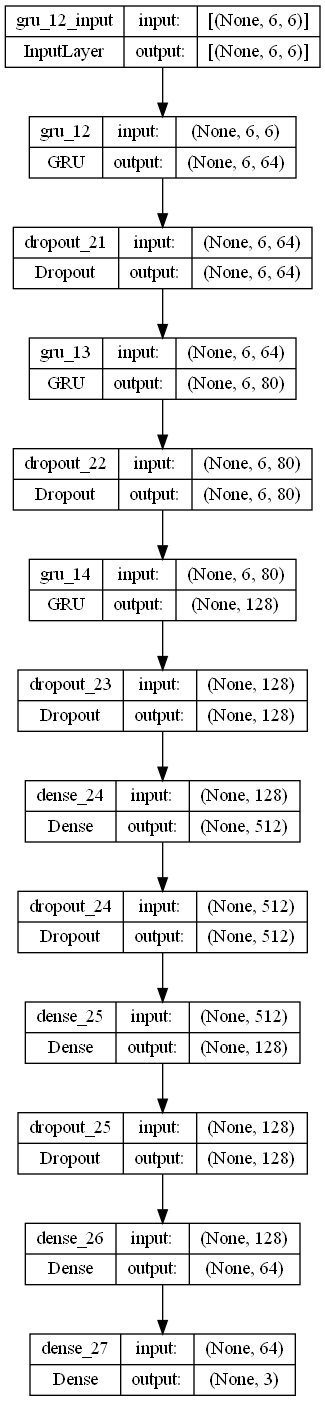

In [98]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [169]:
history = model.fit(x=data, y=label, batch_size=27, epochs=200, validation_data=(test_data, test_label), verbose=2)

Epoch 1/200
3/3 - 12s - loss: 1.0959 - accuracy: 0.3457 - val_loss: 1.0973 - val_accuracy: 0.3333 - 12s/epoch - 4s/step
Epoch 2/200
3/3 - 0s - loss: 1.0666 - accuracy: 0.5309 - val_loss: 1.0988 - val_accuracy: 0.3333 - 107ms/epoch - 36ms/step
Epoch 3/200
3/3 - 0s - loss: 1.0411 - accuracy: 0.5309 - val_loss: 1.1152 - val_accuracy: 0.3333 - 117ms/epoch - 39ms/step
Epoch 4/200
3/3 - 0s - loss: 1.0260 - accuracy: 0.5309 - val_loss: 1.1728 - val_accuracy: 0.3333 - 115ms/epoch - 38ms/step
Epoch 5/200
3/3 - 0s - loss: 0.9975 - accuracy: 0.5309 - val_loss: 1.2231 - val_accuracy: 0.3333 - 144ms/epoch - 48ms/step
Epoch 6/200
3/3 - 0s - loss: 1.0100 - accuracy: 0.5309 - val_loss: 1.1932 - val_accuracy: 0.3333 - 135ms/epoch - 45ms/step
Epoch 7/200
3/3 - 0s - loss: 1.0127 - accuracy: 0.5309 - val_loss: 1.1653 - val_accuracy: 0.3333 - 141ms/epoch - 47ms/step
Epoch 8/200
3/3 - 0s - loss: 1.0018 - accuracy: 0.5309 - val_loss: 1.1530 - val_accuracy: 0.3333 - 233ms/epoch - 78ms/step
Epoch 9/200
3/3 - 0

Epoch 68/200
3/3 - 0s - loss: 0.9484 - accuracy: 0.5309 - val_loss: 1.1940 - val_accuracy: 0.3333 - 116ms/epoch - 39ms/step
Epoch 69/200
3/3 - 0s - loss: 0.9986 - accuracy: 0.5309 - val_loss: 1.1842 - val_accuracy: 0.3333 - 114ms/epoch - 38ms/step
Epoch 70/200
3/3 - 0s - loss: 0.9841 - accuracy: 0.5309 - val_loss: 1.1575 - val_accuracy: 0.3333 - 115ms/epoch - 38ms/step
Epoch 71/200
3/3 - 0s - loss: 0.9686 - accuracy: 0.5309 - val_loss: 1.1464 - val_accuracy: 0.5556 - 118ms/epoch - 39ms/step
Epoch 72/200
3/3 - 0s - loss: 0.9836 - accuracy: 0.5309 - val_loss: 1.1455 - val_accuracy: 0.3333 - 134ms/epoch - 45ms/step
Epoch 73/200
3/3 - 0s - loss: 0.9579 - accuracy: 0.5309 - val_loss: 1.1511 - val_accuracy: 0.3333 - 134ms/epoch - 45ms/step
Epoch 74/200
3/3 - 0s - loss: 0.9732 - accuracy: 0.5309 - val_loss: 1.1726 - val_accuracy: 0.3333 - 132ms/epoch - 44ms/step
Epoch 75/200
3/3 - 0s - loss: 0.9589 - accuracy: 0.5309 - val_loss: 1.1717 - val_accuracy: 0.3333 - 133ms/epoch - 44ms/step
Epoch 76

Epoch 134/200
3/3 - 0s - loss: 0.9442 - accuracy: 0.5679 - val_loss: 1.1030 - val_accuracy: 0.5556 - 141ms/epoch - 47ms/step
Epoch 135/200
3/3 - 0s - loss: 0.9482 - accuracy: 0.5926 - val_loss: 1.1057 - val_accuracy: 0.5556 - 142ms/epoch - 47ms/step
Epoch 136/200
3/3 - 0s - loss: 0.9174 - accuracy: 0.5432 - val_loss: 1.1132 - val_accuracy: 0.5556 - 142ms/epoch - 47ms/step
Epoch 137/200
3/3 - 0s - loss: 0.9553 - accuracy: 0.5802 - val_loss: 1.1210 - val_accuracy: 0.5556 - 141ms/epoch - 47ms/step
Epoch 138/200
3/3 - 0s - loss: 0.9377 - accuracy: 0.5926 - val_loss: 1.1002 - val_accuracy: 0.5556 - 140ms/epoch - 47ms/step
Epoch 139/200
3/3 - 0s - loss: 0.9548 - accuracy: 0.5802 - val_loss: 1.0902 - val_accuracy: 0.5556 - 142ms/epoch - 47ms/step
Epoch 140/200
3/3 - 0s - loss: 0.9446 - accuracy: 0.6049 - val_loss: 1.0887 - val_accuracy: 0.5556 - 147ms/epoch - 49ms/step
Epoch 141/200
3/3 - 0s - loss: 0.9542 - accuracy: 0.6173 - val_loss: 1.0843 - val_accuracy: 0.5556 - 135ms/epoch - 45ms/step


Epoch 200/200
3/3 - 0s - loss: 0.9241 - accuracy: 0.5679 - val_loss: 1.0627 - val_accuracy: 0.5556 - 168ms/epoch - 56ms/step


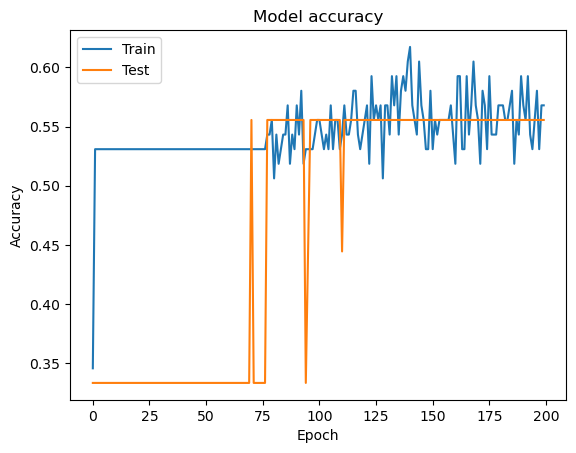

In [170]:
import matplotlib.pyplot as plt

# 정확도(accuracy) 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

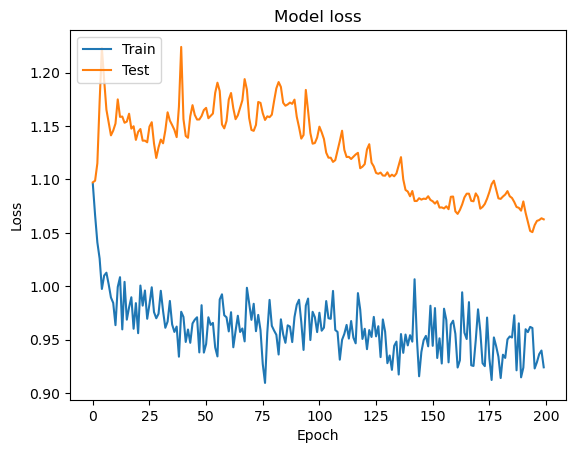

In [171]:
# 손실(loss) 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### <(temporal) centrality 지표 시계열 벡터로 RNN을 통한 분류> 코드 이해를 위한 참고용 코드
주석이나 출력 결과와 함께 살펴보기

# 7. GNN을 통한 분류

# 7-1. GNN을 통한 분류 : 데이터 가공

In [10]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import GConvGRU

In [11]:
# 한 사람의 시점별 72개 노드의 degree , betweenness, closeness

def make_centrality_vector(G) :
    
    cen_vector = []
    G_distance = G.copy()
    for n1,n2,edge_attr_dict in G_distance.edges(data=True):
        if 'distance' not in edge_attr_dict:
            edge_attr_dict['distance'] = 1.0/edge_attr_dict['weight'] # 1/weight = distance
            
    degs = dict(G.degree(weight='weight'))
    bets = nx.betweenness_centrality(G_distance, weight='distance', normalized=True)
    clos = nx.closeness_centrality(G_distance, distance='distance')
#     eigs = nx.eigenvector_centrality(G_distance, weight='weight', max_iter=300)
    
    for deg, bet, clo in zip(list(degs.values()), list(bets.values()), list(clos.values())):
        cen_vector.append([deg, bet, clo])

  
    return torch.FloatTensor(cen_vector) # np.array(cen_vector)

In [12]:
def make_edge_data(G) : 
    edge_info = list(G.edges(data=True))
    edge_index, edge_from, edge_to = [], [], []
    edge_weight = []
    
    for i in range(len(edge_info)) :
        edge_from.append(edge_info[i][0])
        edge_to.append(edge_info[i][1])
        edge_weight.append(edge_info[i][2]['weight']*10)
    
    edge_index.append(edge_from)
    edge_index.append(edge_to)
    
    return torch.LongTensor(edge_index), torch.LongTensor(edge_weight)

# torch.LongTensor()로 하니까 정수형으로 저장해서 edge_attr 전부 0으로 됨. FloatTensor로 하면 가중치가 잘 담기는데, 아래 stconv 오류 발생
# doc에 **edge_weight** (PyTorch LongTensor, optional)- Edge weight vector.
# 그래서 10배 처리

In [13]:
from torch_geometric.data import Data

def make_pytorch_snapshot_data(G) :
    
    x = make_centrality_vector(G)
    edge_index, edge_weight = make_edge_data(G)
    
    snap_G = Data(x=x, edge_index=edge_index, edge_attr=edge_weight)
    
    return snap_G

In [14]:
time_len = len(graph_dict['lt'][0])
pytorch_full_data = []

for i in range(len(graph_dict['lt'])) :
    pytorch_one_data = []
    for j in range(time_len) :
        pytorch_one_data.append(make_pytorch_snapshot_data(graph_dict['lt'][i][j]))
    pytorch_full_data.append(pytorch_one_data)

for i in range(len(graph_dict['rt'])) :
    pytorch_one_data = []
    for j in range(time_len) :
        pytorch_one_data.append(make_pytorch_snapshot_data(graph_dict['rt'][i][j]))
    pytorch_full_data.append(pytorch_one_data)
    
for i in range(len(graph_dict['hc'])) :
    pytorch_one_data = []
    for j in range(time_len) :
        pytorch_one_data.append(make_pytorch_snapshot_data(graph_dict['hc'][i][j]))
    pytorch_full_data.append(pytorch_one_data)

In [15]:
len(pytorch_full_data)

90

In [16]:
# 데이터 x, y로 정리

x = pytorch_full_data

from keras.utils import np_utils
y = np.array(np.repeat([0,1,2], [len(cor_dict['lt']), len(cor_dict['rt']), len(cor_dict['hc'])], axis=0)) 
y = y.reshape(len(cor_dict['lt'])+len(cor_dict['rt'])+len(cor_dict['hc']),-1) 

# 정답 데이터 one-hot vector 처리
y = np_utils.to_categorical(y)

In [17]:
print(y.shape)

(90, 3)


### <GNN을 통한 분류 : 데이터 가공> 코드 이해를 위한 참고용 코드

keras, tensorflow, pytorch, pyG, temporal pyG import error check

In [11]:
import tensorflow as tf
import keras

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, LSTM, Dense, Dropout, Flatten, Embedding, TimeDistributed
from tensorflow.keras.optimizers import SGD

In [13]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import GConvGRU

pytorch 예제 - pytorch 텐서데이터셋, 데이터로더 이해

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [11]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [13]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
    print(batch_idx)
    print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

0
[tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]), tensor([[152.],
        [196.]])]
Epoch    0/20 Batch 1/3 Cost: 60641.601562
1
[tensor([[89., 91., 90.],
        [93., 88., 93.]]), tensor([[180.],
        [185.]])]
Epoch    0/20 Batch 2/3 Cost: 19037.494141
2
[tensor([[73., 66., 70.]]), tensor([[142.]])]
Epoch    0/20 Batch 3/3 Cost: 3077.985107
0
[tensor([[73., 66., 70.],
        [73., 80., 75.]]), tensor([[142.],
        [152.]])]
Epoch    1/20 Batch 1/3 Cost: 1623.979858
1
[tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]]), tensor([[196.],
        [185.]])]
Epoch    1/20 Batch 2/3 Cost: 1140.045898
2
[tensor([[89., 91., 90.]]), tensor([[180.]])]
Epoch    1/20 Batch 3/3 Cost: 219.637589
0
[tensor([[89., 91., 90.],
        [73., 66., 70.]]), tensor([[180.],
        [142.]])]
Epoch    2/20 Batch 1/3 Cost: 61.623528
1
[tensor([[93., 88., 93.],
        [73., 80., 75.]]), tensor([[185.],
        [152.]])]
Epoch    2/20 Batch 2/3 Cost: 24.428928
2
[tensor([[ 96.,  98., 1

pyG 기본 구조 예제

In [39]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1],
                        [1, 0],
                        [1, 2],
                        [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())
data
# x : [노드 수, 각 노드 특징 수]
# edge_index : [2, 연결 수]
# edge_attr : [연결 수, 각 연결 특징 수]
# y : 타겟 - 그래프 레벨이라면 [노드 수, *]

Data(x=[3, 1], edge_index=[2, 4])

temporal pyG model class 예제

In [ ]:
class RecurrentGCN(torch.nn.Module):

    def __init__(self, node_features, num_classes):
        super(RecurrentGCN, self).__init__()
        self.recurrent_1 = GConvGRU(node_features, 32, 5)
        self.recurrent_2 = GConvGRU(32, 16, 5)
        self.linear = torch.nn.Linear(16, num_classes)

    def forward(self, x, edge_index, edge_weight):
        x = self.recurrent_1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.recurrent_2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# 7-2. GNN을 통한 분류 : 모델링

In [18]:
def get_multiple_elements_in_list(in_list, in_indices):
    """리스트에서 복수인덱스 값을 가져온다"""
    return [in_list[i] for i in in_indices]

In [19]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            # self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [32]:
import torch
from torch_geometric.nn import global_mean_pool, SAGPooling
import torch.nn as nn
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric_temporal.nn.attention.stgcn import STConv


class customGNN(torch.nn.Module):

    def __init__(self, node_features, num_classes):
        super().__init__()
        self.stconv1 = STConv(num_nodes=72, in_channels=node_features, hidden_channels=9, out_channels=27,
                              kernel_size=2, K=1, normalization=None) 
        self.stconv2 = STConv(num_nodes=72, in_channels=27, hidden_channels=54, out_channels=108,
                              kernel_size=2, K=1, normalization=None) 
#         self.stconv3 = STConv(num_nodes=72, in_channels=18, hidden_channels=3, out_channels=36,
#                       kernel_size=1, K=1, normalization=None) 
        
        self.linear1 = torch.nn.Linear(108, 64, bias=True) 
        self.dropout1 = nn.Dropout2d(0.5)
#         self.linear2 = torch.nn.Linear(128, 64, bias=True) 
#         self.dropout2 = nn.Dropout2d(0.5)
        self.linear2 = torch.nn.Linear(64, num_classes, bias=True)
        
        # 전연결층 가중치 초기화
        torch.nn.init.xavier_uniform_(self.linear1.weight)
        torch.nn.init.xavier_uniform_(self.linear2.weight)
#         torch.nn.init.xavier_uniform_(self.linear3.weight)

    def forward(self, x, edge_index, edge_weight):
        x = self.stconv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
        x = self.stconv2(x, edge_index, edge_weight) 
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
#         x = self.stconv3(x, edge_index, edge_weight) 
#         x = F.relu(x)
#         x = F.dropout(x, training=self.training)
        
#         x1 = x[0, 0,]
#         x2 = x[0, 1,] # 2개의 72*16 중에 마지막 72*16 선택
        x = x[0, 1,]
        
        # conv로 결합
        #x = self.conv(x) # conv
        #x = x.view(72, 36)
        
        # 두 층 평균
#         x = x.mean(dim=1)
#         x = x.view(72,-1)
        
        batch = None
        batch = torch.zeros(x.shape[0], dtype=int) if batch is None else batch 
        
        
#         x1 = global_mean_pool(x1, batch)
#         x2 = global_mean_pool(x2, batch)
        x = global_mean_pool(x, batch)
        
        # global pool 대신 전연결층 72*16 풀어서 해보기 - 결과 worse
        # x = x.contiguous().view(1, 72*18) # 
        
#         x = torch.cat([x1, x2], dim=1)
        
        # fully-connected
        x = F.relu(self.linear1(x)) # ReLU : 은닉층에서의 활성화 함수로 가장 많이 사용되는 함수
        x = self.dropout1(x)
        x = F.relu(self.linear2(x))
#         x = self.dropout2(x)
#         x = F.relu(self.linear3(x))
        
        # classification
        x = F.log_softmax(x, dim=1)
        
        return x

In [21]:
from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

k = 10 
kfold = KFold(n_splits=k, shuffle=True)
# kfold =StratifiedKFold(n_splits=k, shuffle=True)

acc_score = [] # 정확도를 정리할 리스트
cf_matrix = [] # 혼동행렬을 정리할 리스트

In [ ]:
%%time

from sklearn.metrics import confusion_matrix # 혼동행렬

device = 'cuda' if torch.cuda.is_available() else 'cpu'

num_epochs = 400
# batch_size = 9
loss_fn = nn.CrossEntropyLoss() 
k_idx = 0

for train_index, test_index in kfold.split(x, y.argmax(axis=1)) :
    k_idx += 1
    x_train = get_multiple_elements_in_list(x, train_index)
    x_test = get_multiple_elements_in_list(x, test_index)
    y_train, y_test = y[train_index], y[test_index]
    
    # model 초기화
    model = customGNN(node_features = 3, num_classes = 3).to(device) 
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # early_stopping 객체 초기화
    early_stopping = EarlyStopping(patience = 100, verbose = True)

    for epoch in range(num_epochs) :
        
        for i, one_data in enumerate(x_train) :
            model.train()
            # train_loss = [] # print 용
                  
            # input data
            batch_x = torch.stack([one_data[0].x, one_data[1].x, one_data[2].x,
                one_data[3].x, one_data[4].x, one_data[5].x]).unsqueeze(0)
            batch_edge_index = one_data[5].edge_index # 가장 마지막 시점의 edge 정보
            batch_edge_attr = one_data[5].edge_attr

            batch_y = torch.Tensor(np.array([y_train[i]]))

            # forward
            y_pred = model(batch_x, batch_edge_index, batch_edge_attr) 
            loss = loss_fn(y_pred, batch_y)
            
            # backward
            loss.backward()
            # train_loss.append(loss.item()) # print 용
            
            # for batch 
            if i % 9 == 8 :
                # update weights
                optimizer.step()
                optimizer.zero_grad()
                
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
        
        # print('train_loss :', np.average(train_loss))       
        
        # epoch당 평균 loss 계산 => early stopping
        with torch.no_grad() :
            model.eval()

            vaild_losses = []
            for i, one_data in enumerate(x_test) :

                # input data
                batch_x = torch.stack([one_data[0].x, one_data[1].x, one_data[2].x,
                                       one_data[3].x, one_data[4].x, one_data[5].x]).unsqueeze(0)
                batch_edge_index = one_data[5].edge_index # 가장 마지막 시점의 edge 정보
                batch_edge_attr = one_data[5].edge_attr

                batch_y = torch.Tensor(np.array([y_test[i]]))

                # predict
                y_pred = model(batch_x, batch_edge_index, batch_edge_attr)
                loss = loss_fn(y_pred, batch_y)
                vaild_losses.append(loss.item())

        # early stopping check
        valid_loss = np.average(vaild_losses)
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print('Early Stopping in', epoch)
            print('End', k_idx, 'th fold')
            break
            
            
    # best model이 저장되어있는 last checkpoint를 로드
    model.load_state_dict(torch.load('checkpoint.pt'))
    
    # train 정확도
    with torch.no_grad() :
        model.eval()
        
        accuracy = []
        for i, one_data in enumerate(x_train) :

            # input data
            batch_x = torch.stack([one_data[0].x, one_data[1].x, one_data[2].x,
                                   one_data[3].x, one_data[4].x, one_data[5].x]).unsqueeze(0)
            batch_edge_index = one_data[5].edge_index # 가장 마지막 시점의 edge 정보
            batch_edge_attr = one_data[5].edge_attr

            batch_y = torch.Tensor(np.array([y_train[i]]))

            # predict
            y_pred = model(batch_x, batch_edge_index, batch_edge_attr)
            accuracy.append((torch.argmax(y_pred) == torch.argmax(batch_y)))
        
        print(k_idx, 'th train accuracy :', np.average(accuracy))
    
    # test 정확도
    with torch.no_grad() :
        model.eval()
        
        accuracy = []
        y_pred_list = [] # 혼동행렬
        y_true_list = [] # 혼동행렬
        for i, one_data in enumerate(x_test) :

            # input data
            batch_x = torch.stack([one_data[0].x, one_data[1].x, one_data[2].x,
                                   one_data[3].x, one_data[4].x, one_data[5].x]).unsqueeze(0)
            batch_edge_index = one_data[5].edge_index # 가장 마지막 시점의 edge 정보
            batch_edge_attr = one_data[5].edge_attr

            batch_y = torch.Tensor(np.array([y_test[i]]))

            # predict
            y_pred = model(batch_x, batch_edge_index, batch_edge_attr)
            accuracy.append((torch.argmax(y_pred) == torch.argmax(batch_y)))
            
            # 혼동행렬
            y_true_list.append(torch.argmax(batch_y))
            y_pred_list.append(torch.argmax(y_pred))
            
            
        # 혼동행렬
        print("혼동행렬 :")
        print(confusion_matrix(y_true_list, y_pred_list))
        cf_matrix.append(confusion_matrix(y_true_list, y_pred_list))
        
        print(k_idx, 'th test accuracy :', np.average(accuracy))
        acc_score.append(np.average(accuracy))

In [61]:
# node_features = 3 
# stconv 1 & 2: 3 -> (hidden 9) 27 -> (hidden 54) 108
# Linear 1 & 2 : 108 -> 64 -> 3(=num_classes)
# lr = 0.001

# k번 계산된 정확도의 평균
avg_acc_score = sum(acc_score) / k

print('정확도 :', acc_score)
print('정확도 평균 :', avg_acc_score)

정확도 : [1.0, 0.8888888888888888, 1.0, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.8888888888888888, 0.6666666666666666, 0.6666666666666666]
정확도 평균 : 0.8222222222222222


In [42]:
cf_matrix

[array([[1, 0, 2],
        [2, 0, 0],
        [0, 0, 4]], dtype=int64),
 array([[3, 0, 0],
        [2, 0, 0],
        [0, 0, 4]], dtype=int64),
 array([[1, 1, 0],
        [0, 3, 0],
        [0, 0, 4]], dtype=int64),
 array([[2, 0, 0],
        [3, 0, 0],
        [1, 0, 3]], dtype=int64),
 array([[2, 0, 0],
        [2, 0, 0],
        [0, 0, 5]], dtype=int64),
 array([[2, 0, 0],
        [1, 1, 0],
        [0, 1, 4]], dtype=int64),
 array([[0, 2, 0],
        [0, 2, 0],
        [0, 0, 5]], dtype=int64),
 array([[1, 1, 0],
        [1, 1, 0],
        [0, 1, 4]], dtype=int64),
 array([[1, 0, 1],
        [2, 0, 0],
        [0, 0, 5]], dtype=int64),
 array([[1, 1, 0],
        [2, 0, 0],
        [0, 0, 5]], dtype=int64)]

### <GNN을 통한 분류 : 모델링> 코드 이해를 위한 참고용 코드

In [14]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv

In [81]:
class TemporalConv(nn.Module):

    def __init__(self, in_channels: int, out_channels: int, kernel_size: int = 3):
        super(TemporalConv, self).__init__()
        self.conv_1 = nn.Conv2d(in_channels, out_channels, (1, kernel_size))
        self.conv_2 = nn.Conv2d(in_channels, out_channels, (1, kernel_size))
        self.conv_3 = nn.Conv2d(in_channels, out_channels, (1, kernel_size))

    def forward(self, X: torch.FloatTensor) -> torch.FloatTensor:

        X = X.permute(0, 3, 2, 1) # torch.Size([1, 3, 72, 6])
        P = self.conv_1(X)
        Q = torch.sigmoid(self.conv_2(X))
        PQ = P * Q
        H = F.relu(PQ + self.conv_3(X))
        H = H.permute(0, 3, 2, 1)
        return H